# Multivariate Analysis

In [1]:
from pathlib import Path

from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

from easy_analysis.plots import multivariate, univariate, insights
from helpers import constants as C

### Import Datasets

In [2]:
data_path = Path("data/Gurgaon")

res_apartment = pd.read_csv(data_path / "res_apartment.csv")
rent_apartment = pd.read_csv(data_path / "rent_apartment_house.csv")
ind_floor = pd.read_csv(data_path / "ind_floor.csv")
rent_ind_floor = pd.read_csv(data_path / "rent_ind_floor.csv")
ind_house = pd.read_csv(data_path / "ind_house.csv")
res_land = pd.read_csv(data_path / "res_land.csv")

In [3]:
data_map = {
    "Res Apartment": res_apartment,
    "Rent Apartment": rent_apartment,
    "Ind Floor": ind_floor,
    "Rent Ind Floor": rent_ind_floor,
    "Ind House": ind_house,
    "Res Land": res_land,
}

## General Step

In [4]:
res_apartment.columns

Index(['PROP_ID', 'SPID', 'CITY', 'PRICE', 'PRICE_SQFT', 'AREA',
       'TOTAL_LANDMARK_COUNT', 'PROP_HEADING', 'DESCRIPTION', 'PROPERTY_TYPE',
       'FURNISH', 'FACING', 'AGE', 'TOTAL_FLOOR', 'BEDROOM_NUM', 'PROP_NAME',
       'BALCONY_NUM', 'FLOOR_NUM', 'LATITUDE', 'LONGITUDE', 'BHK_BED',
       'LOCALITY_NAME', 'BUILDING_NAME', 'SOCIETY_NAME', 'ADDRESS',
       'TRANSPORATION', 'ACCOMODATION', 'LEISURE', 'EDUCATION', 'HEALTH',
       'OTHER', 'AMENITIES_SCORE', 'FEATURES_SCORE'],
      dtype='object')

In [5]:
imp_cols = ["PRICE", "AREA"]
num_cols = ["AMENITIES_SCORE", "FEATURES_SCORE"]
cat_cols = ["BEDROOM_NUM", "BALCONY_NUM", "FURNISH", "FACING", "AGE", "TOTAL_FLOOR", "FLOOR_NUM"]

len(num_cols), len(cat_cols)

(2, 7)

### Proprocesing

In [6]:
for k, data in data_map.items():
    data["PROPERTY_TYPE"] = k
    data["PRICE"] = data["PRICE"].div(C.LAKH)
    data["PROP_ID"] = "https://99acres.com/" + data["PROP_ID"].str.upper()
    data["BEDROOM_NUM"] = data["BEDROOM_NUM"].apply(lambda x: ">5" if x > 5 else x)
    data["BALCONY_NUM"] = data["BALCONY_NUM"].apply(lambda x: ">4" if x > 4 else x)
    data["AGE"] = data["AGE"].str.split(n=1).str.get(0)

## Residental Apartment

In [7]:
print(res_apartment.shape)
res_apartment.head()

(4049, 33)


PROP_ID      SPID     CITY  PRICE  PRICE_SQFT  \
0  https://99acres.com/D68894450  68894450  gurgaon  11.00       146.0   
1  https://99acres.com/Y70794212  70794212  gurgaon  17.75      4277.0   
2  https://99acres.com/S70190322  70190322  gurgaon  20.00      5463.0   
3  https://99acres.com/C64640776  64640776  gurgaon  20.33      3663.0   
4  https://99acres.com/F70190474  70190474  gurgaon  20.50      5599.0   

      AREA  TOTAL_LANDMARK_COUNT                     PROP_HEADING  \
0  10777.0                  15.0  5 bhk flat in sector 42 gurgaon   
1    600.0                   3.0  1 bhk flat in sector 95 gurgaon   
2    366.0                  15.0  1 bhk flat in sector 95 gurgaon   
3    555.0                   8.0  2 bhk flat in sector 86 gurgaon   
4    366.0                  15.0  1 bhk flat in sector 95 gurgaon   

                                         DESCRIPTION  PROPERTY_TYPE  ...  \
0  a 4 bhk duplex flat for rent in sector 42 gurg...  Res Apartment  ...   
1  ramsons kshitij , sector 95 imt manesar, main ...  Res Apartment  ...   
2  situated in sector 95 gurgaon, rof ananda is a...  Res Apartment  ...   
3  check out this 2 bhk apartment for sale in gls...  Res Apartment  ...   
4  located in the popular residential address of ...  Res Apartment  ...   

        SOCIETY_NAME ADDRESS TRANSPORATION ACCOMODATION LEISURE EDUCATION  \
0  dlf the magnolias   a 209           4.0          3.0     0.0       3.0   
1    ramsons kshitij     216           0.0          0.0     0.0       0.0   
2         rof ananda     405           3.0          0.0     0.0       0.0   
3      gls avenue 86     301           3.0          0.0     1.0       2.0   
4         rof ananda     509           3.0          0.0     0.0       0.0   

   HEALTH OTHER  AMENITIES_SCORE  FEATURES_SCORE  
0     4.0   1.0              141              63  
1     3.0   0.0               68              42  
2     0.0  12.0               62              32  
3     0.0   2.0              106              52  
4     0.0  12.0               62              32  

[5 rows x 33 columns]

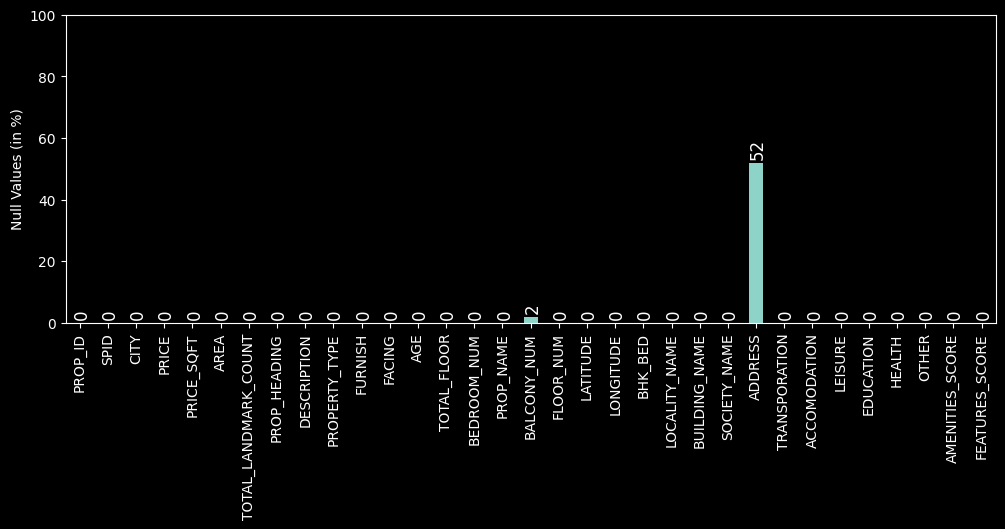

In [8]:
insights.null_plot(res_apartment)

In [9]:
res_apartment[res_apartment["BALCONY_NUM"].isnull()]

PROP_ID      SPID     CITY    PRICE  PRICE_SQFT  \
111   https://99acres.com/T70698362  70698362  gurgaon    46.00      7558.0   
317   https://99acres.com/V70954128  70954128  gurgaon    86.74     11121.0   
437   https://99acres.com/V70954130  70954130  gurgaon    99.60      9999.0   
525   https://99acres.com/M70006308  70006308  gurgaon   108.00      9001.0   
650   https://99acres.com/S70006298  70006298  gurgaon   115.00      8512.0   
...                             ...       ...      ...      ...         ...   
3967  https://99acres.com/X70217012  70217012  gurgaon   953.00     42736.0   
3968  https://99acres.com/A70725920  70725920  gurgaon   953.00     42736.0   
3991  https://99acres.com/L70497382  70497382  gurgaon  1068.00     13475.0   
3992  https://99acres.com/B68371078  68371078  gurgaon  1068.00     13475.0   
4005  https://99acres.com/L70217014  70217014  gurgaon  1206.00     42736.0   

        AREA  TOTAL_LANDMARK_COUNT                     PROP_HEADING  \
111    608.5                   6.0  2 bhk flat in sector 76 gurgaon   
317    992.0                   9.0              2 bhk flat in sohna   
437   1440.0                   9.0              3 bhk flat in sohna   
525   1194.0                  10.0  2 bhk flat in sector 68 gurgaon   
650   1351.0                  12.0  2 bhk flat in sector 79 gurgaon   
...      ...                   ...                              ...   
3967  2229.0                   9.0  4 bhk flat in sector 53 gurgaon   
3968  2229.0                   9.0  4 bhk flat in sector 53 gurgaon   
3991  7928.0                  11.0  4 bhk flat in sector 76 gurgaon   
3992  7928.0                  11.0  4 bhk flat in sector 76 gurgaon   
4005  2822.0                   9.0  5 bhk flat in sector 53 gurgaon   

                                            DESCRIPTION  PROPERTY_TYPE  ...  \
111   let your dream of owning a flat come true with...  Res Apartment  ...   
317   enjoy a blissful living experience in ashiana ...  Res Apartment  ...   
437   ashiana anmol is an under construction project...  Res Apartment  ...   
525   let your dream of owning a flat come true with...  Res Apartment  ...   
650   let your dream of owning a flat come true with...  Res Apartment  ...   
...                                                 ...            ...  ...   
3967  tulip monsella offers 4 bhk flats in sector 53...  Res Apartment  ...   
3968  enjoy a blissful living experience in tulip mo...  Res Apartment  ...   
3991  experience a new style of living with whitelan...  Res Apartment  ...   
3992  own a 4 bhk apartment in whiteland the aspen, ...  Res Apartment  ...   
4005  tulip monsella offers 5 bhk flats in sector 53...  Res Apartment  ...   

             SOCIETY_NAME ADDRESS TRANSPORATION ACCOMODATION LEISURE  \
111     suncity avenue 76     NaN           1.0          1.0     1.0   
317         ashiana anmol     NaN           2.0          2.0     1.0   
437         ashiana anmol     NaN           2.0          2.0     1.0   
525         m3m sierra 68     NaN           1.0          1.0     3.0   
650           godrej aria     NaN           2.0          2.0     4.0   
...                   ...     ...           ...          ...     ...   
3967       tulip monsella     NaN           1.0          2.0     2.0   
3968       tulip monsella     NaN           1.0          2.0     2.0   
3991  whiteland the aspen     NaN           2.0          2.0     4.0   
3992  whiteland the aspen     NaN           2.0          2.0     4.0   
4005       tulip monsella     NaN           1.0          2.0     2.0   

     EDUCATION  HEALTH OTHER  AMENITIES_SCORE  FEATURES_SCORE  
111        1.0     2.0   0.0                0               0  
317        2.0     1.0   1.0                0               0  
437        2.0     1.0   1.0                0               0  
525        2.0     1.0   2.0                0               0  
650        2.0     1.0   1.0                0               0  
...        ...     ...   ...

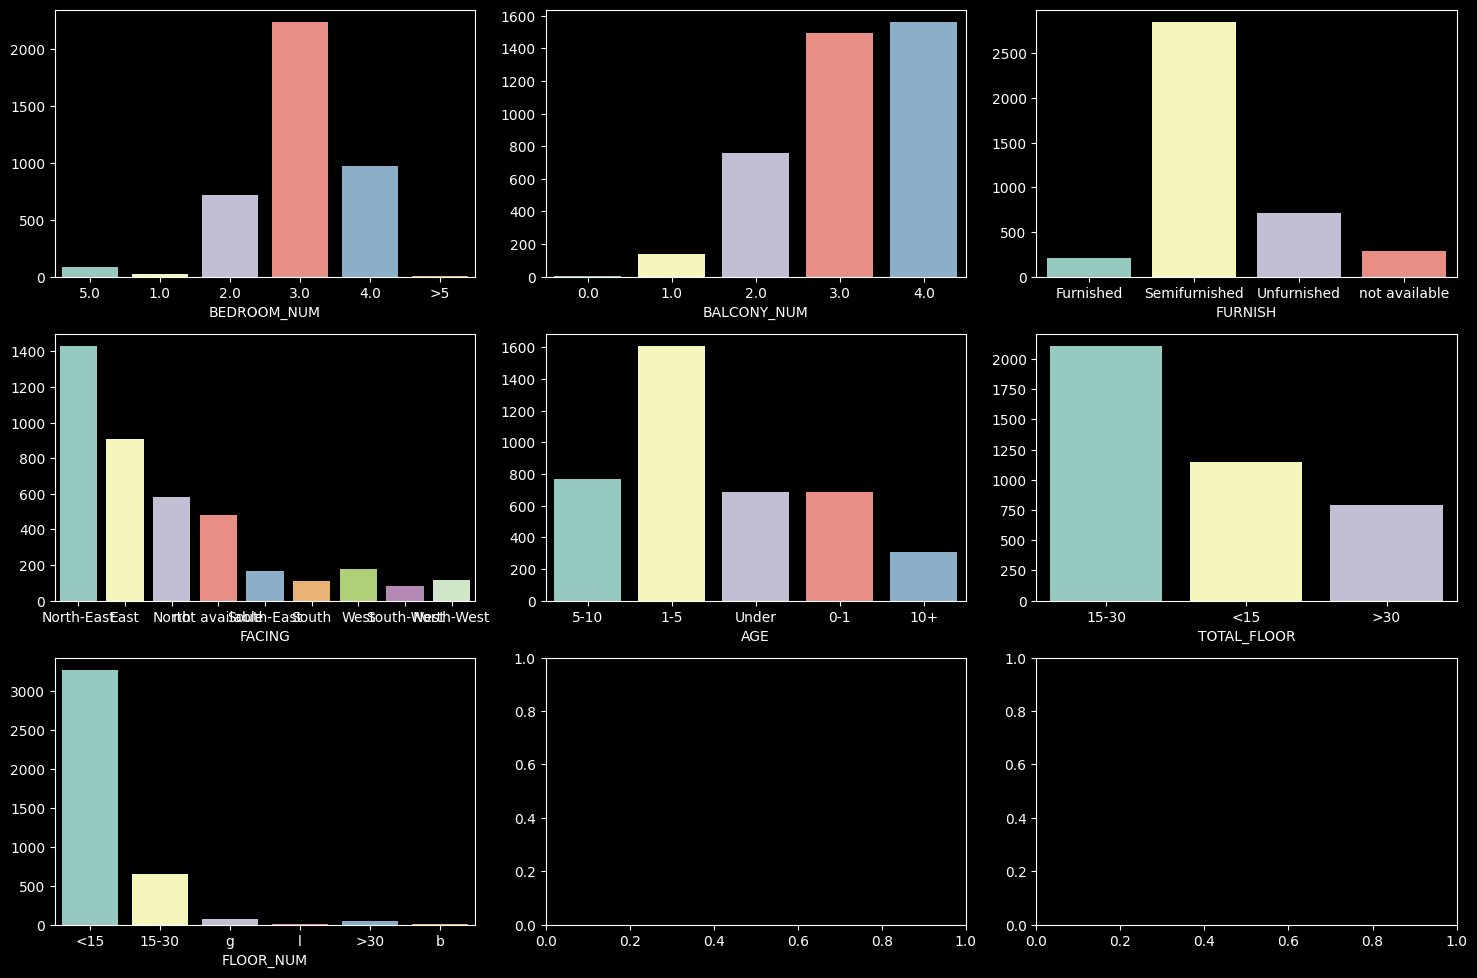

In [10]:
multivariate.count_plot(res_apartment, cat_cols)

- **FURNISH**: Unbalnced distribution.
- **FACING**: Many categories have low counts.
- **AGE**: Better distribution.
- **TOTAL_FLOOR**: Better distribution.
- **FLOOR_NUM**: Unbalnced distribution.
    > `g, l, b` are some other encoded values in FLOOR_NUM feature.

> **Drop:** `FURNISH`, `FLOOR_NUM`.

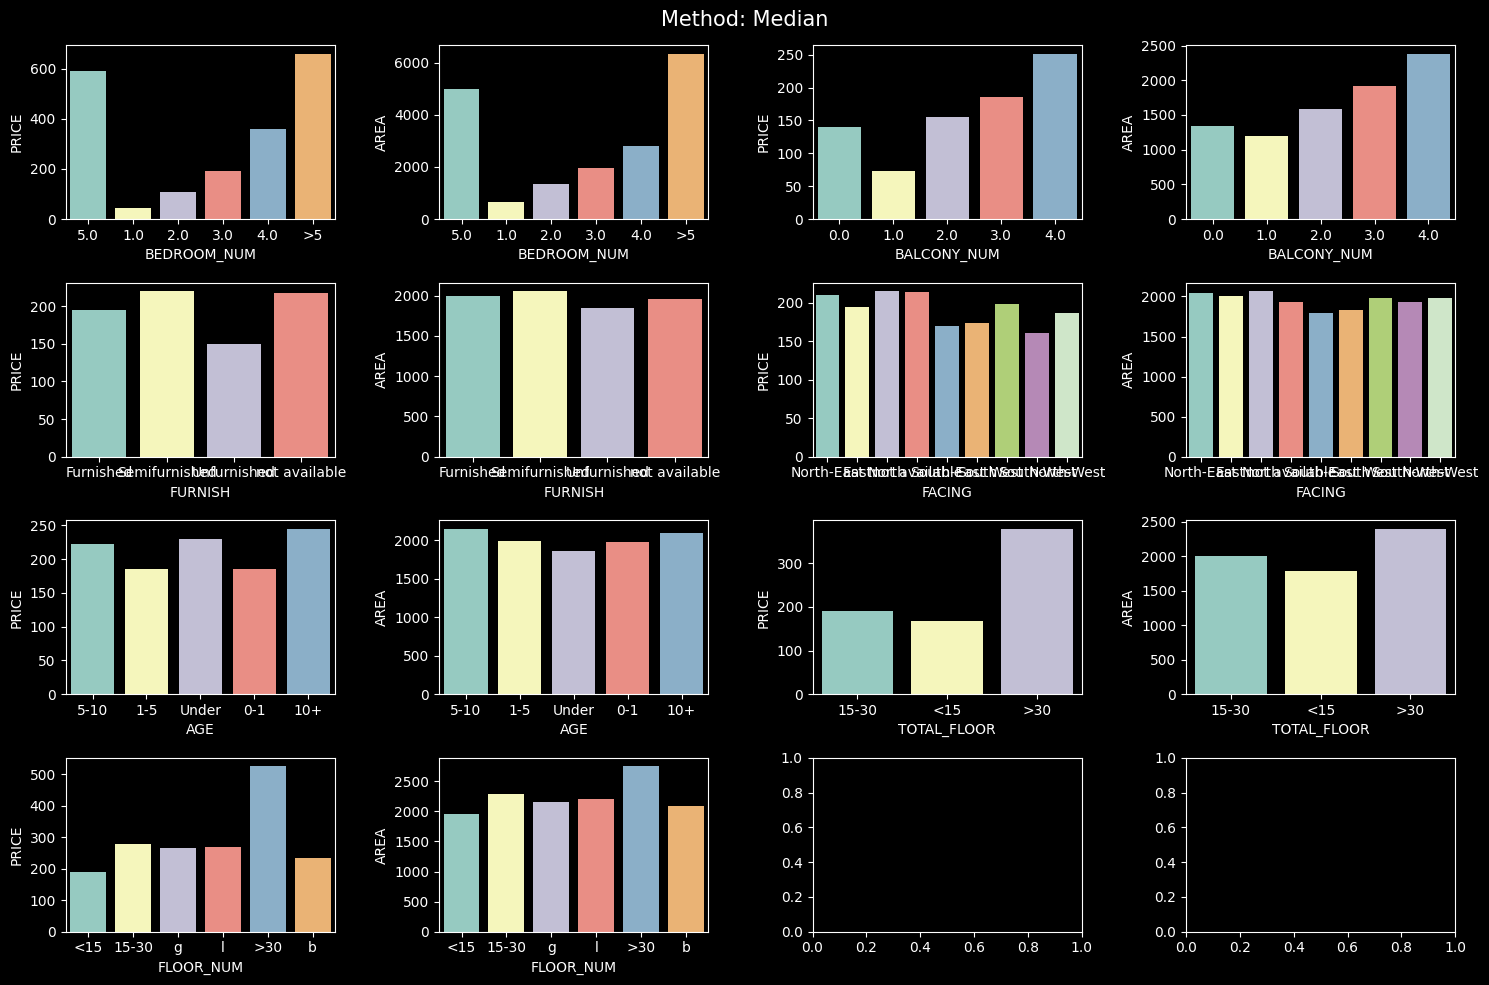

In [11]:
multivariate.agg_plot(res_apartment, cat_cols, imp_cols, ["median"])

All features have almost **uniform distribution**.

In [12]:
res_apartment[imp_cols + num_cols].describe()

PRICE          AREA  AMENITIES_SCORE  FEATURES_SCORE
count  4049.000000   4049.000000      4049.000000     4049.000000
mean    283.357506   2233.973203        96.922203       47.892319
std     302.659953   1141.293733        37.210624       19.666620
min      11.000000    342.000000         0.000000        0.000000
25%     138.000000   1620.000000        67.000000       38.000000
50%     200.000000   2000.000000       103.000000       53.000000
75%     347.000000   2588.000000       128.000000       63.000000
max    4500.000000  16200.000000       150.000000       72.000000

### PRICE / AREA

<Axes: xlabel='AREA', ylabel='PRICE'>

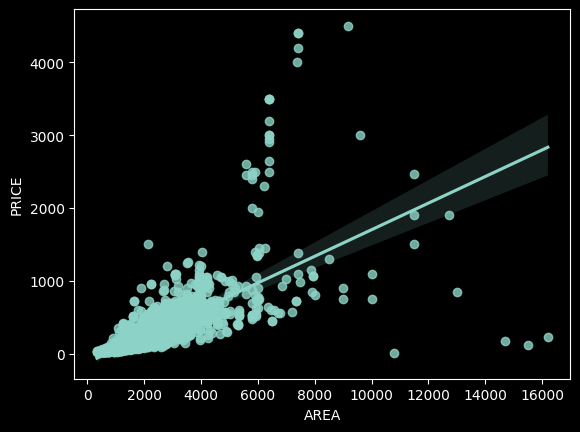

In [13]:
sns.regplot(res_apartment, x="AREA", y="PRICE")

(4014, 33)


<Axes: xlabel='AREA', ylabel='PRICE'>

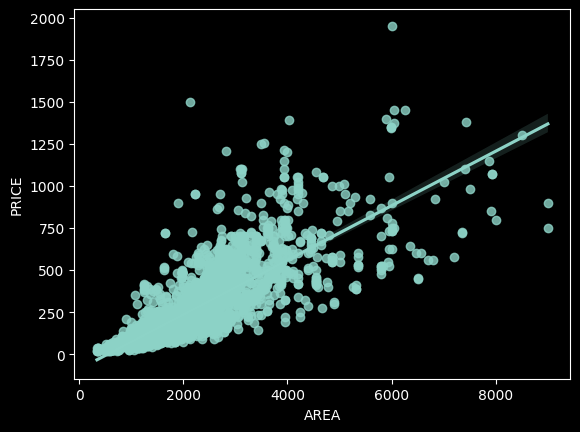

In [14]:
res_apartment.query("PRICE<2000 and AREA<10000", inplace=True)
print(res_apartment.shape)
sns.regplot(res_apartment, x="AREA", y="PRICE")

Now this looks better relation between PRICE and AREA features.

### PRICE / PRICE_SQFT

<Axes: xlabel='PRICE_SQFT', ylabel='PRICE'>

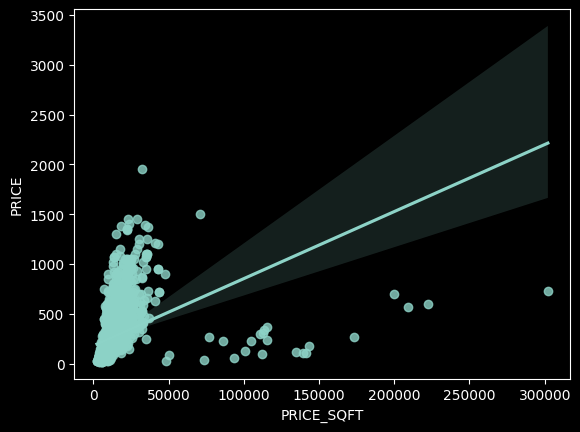

In [15]:
sns.regplot(res_apartment, x="PRICE_SQFT", y="PRICE")

<Axes: xlabel='PRICE_SQFT', ylabel='PRICE'>

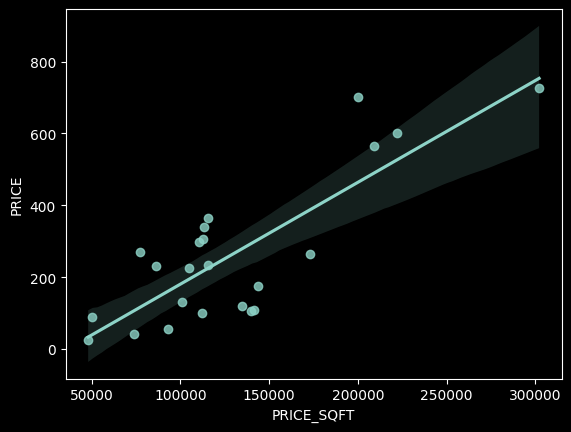

In [16]:
sns.regplot(res_apartment.query("PRICE_SQFT>47000 and PRICE<900"), x="PRICE_SQFT", y="PRICE")

<Axes: xlabel='PRICE_SQFT', ylabel='PRICE'>

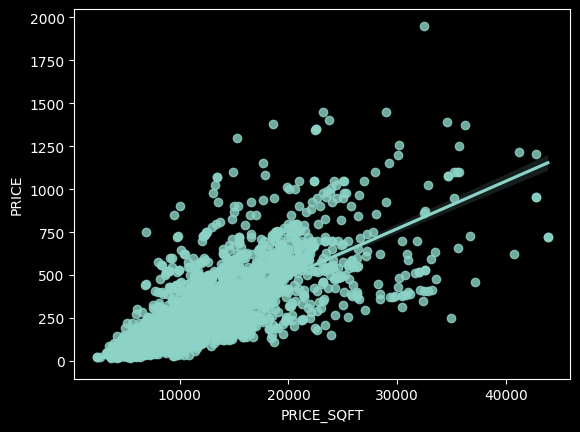

In [17]:
sns.regplot(res_apartment.query("PRICE_SQFT<47000"), x="PRICE_SQFT", y="PRICE")

I cannot use this (`PRICE_SQFT`) feature while model building because it's just the value of `PRICE/AREA` nothing extra.

### PRICE / AMENITIES_SCORE

<Axes: xlabel='AMENITIES_SCORE', ylabel='PRICE'>

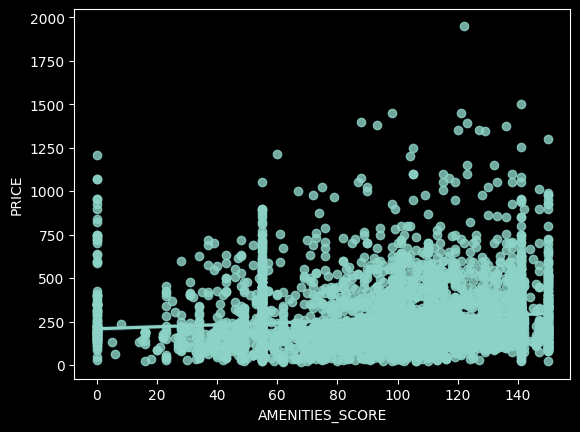

In [18]:
sns.regplot(res_apartment, x="AMENITIES_SCORE", y="PRICE")

Ohh :(,  
This extracted feature doesn't form a good relation with target feature.

### PRICE / FEATURES_SCORE

<Axes: xlabel='FEATURES_SCORE', ylabel='PRICE'>

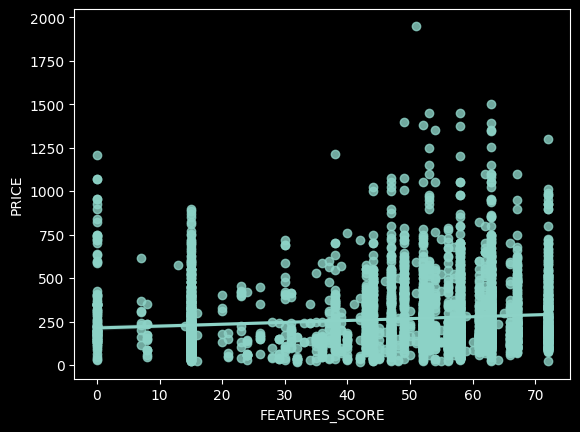

In [19]:
sns.regplot(res_apartment, x="FEATURES_SCORE", y="PRICE")

Ohh :(,  
This extracted feature doesn't form a good relation with target feature.

### LOCALITY_NAME

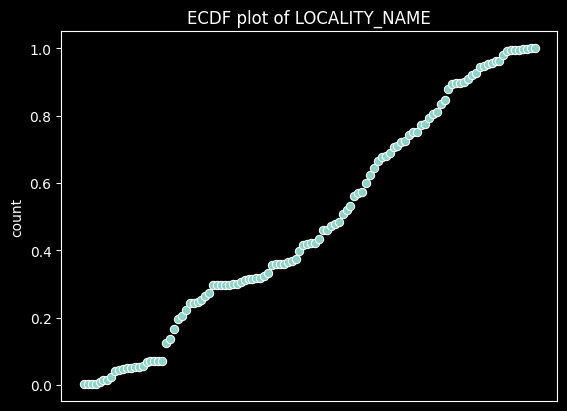

In [20]:
plt.xticks([])
univariate.ecdf_plot(res_apartment["LOCALITY_NAME"])

In [21]:
res_apartment["LOCALITY_NAME"].nunique()

116

In [22]:
res_apartment["LOCALITY_NAME"].value_counts()[:10]

LOCALITY_NAME
sector 102 gurgaon     204
sector 85 gurgaon      131
sector 62 gurgaon      121
sector 106 gurgaon     119
sector 104 gurgaon     112
sector 83 gurgaon      106
sector 48 gurgaon      105
sector 37d gurgaon     105
sector 65 gurgaon      101
sector 113 gurgaon     101
Name: count, dtype: int64

<Axes: xlabel='LOCALITY_NAME', ylabel='PRICE'>

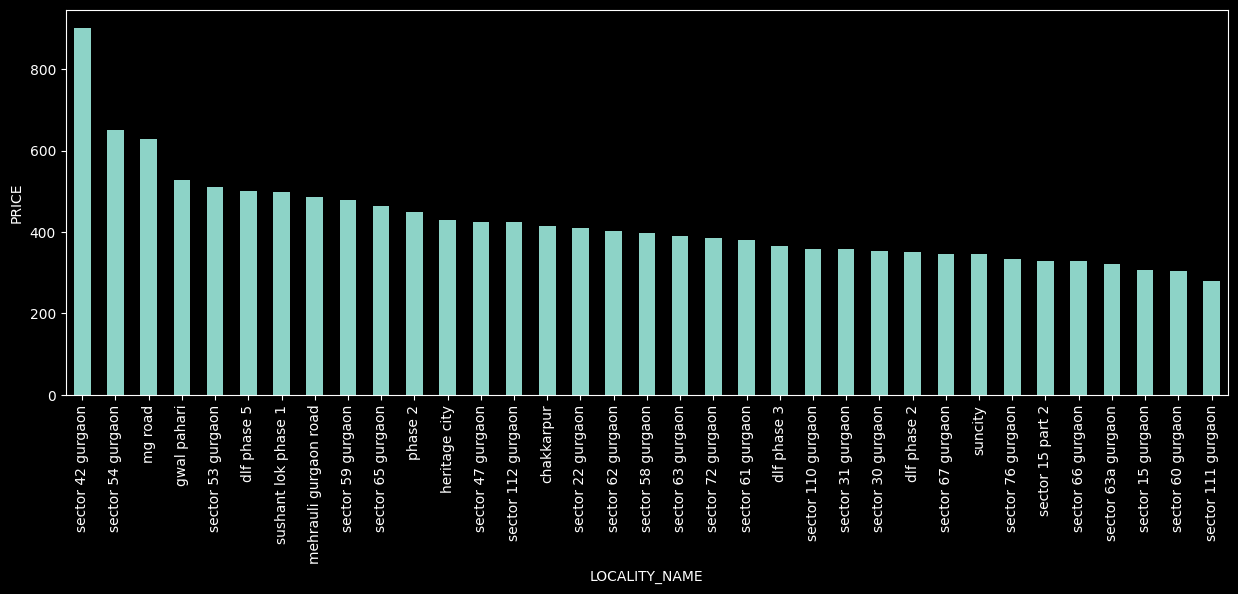

In [23]:
res_apartment.groupby("LOCALITY_NAME")["PRICE"].median().sort_values(ascending=False)[:35].plot.bar(
    figsize=(15, 5), ylabel="PRICE"
)

## Rental Apartment

In [24]:
print(rent_apartment.shape)
rent_apartment.head()

(2060, 33)


PROP_ID      SPID     CITY  PRICE  PRICE_SQFT   AREA  \
0  https://99acres.com/U70794112  70794112  gurgaon  0.070        10.0  700.0   
1  https://99acres.com/O70607360  70607360  gurgaon  0.075        14.0  514.0   
2  https://99acres.com/S69621256  69621256  gurgaon  0.085         8.0  980.0   
3  https://99acres.com/J70794066  70794066  gurgaon  0.085         8.0  980.0   
4  https://99acres.com/F70794132  70794132  gurgaon  0.085         9.0  910.0   

   TOTAL_LANDMARK_COUNT                      PROP_HEADING  \
0                  15.0   1 bhk flat in sector 95 gurgaon   
1                   3.0  2 bhk flat in sector 107 gurgaon   
2                   3.0   2 bhk flat in sector 95 gurgaon   
3                   3.0   2 bhk flat in sector 95 gurgaon   
4                  15.0   2 bhk flat in sector 95 gurgaon   

                                         DESCRIPTION   PROPERTY_TYPE  ...  \
0  rof ananda , sector 95, near to wazirpur villa...  Rent Apartment  ...   
1  cheap rent and best place and location at dwar...  Rent Apartment  ...   
2  find this 2 bhk apartment for rent in sector 9...  Rent Apartment  ...   
3  ramsons kshitij , sector 95, near to wazirpur ...  Rent Apartment  ...   
4  rof ananda , sector 95, near to wazirpur villa...  Rent Apartment  ...   

                SOCIETY_NAME ADDRESS TRANSPORATION ACCOMODATION LEISURE  \
0                 rof ananda     218           3.0          0.0     0.0   
1  signature global solera 2     NaN           1.0          0.0     0.0   
2            ramsons kshitij     NaN           0.0          0.0     0.0   
3            ramsons kshitij     512           0.0          0.0     0.0   
4                 rof ananda     619           3.0          0.0     0.0   

  EDUCATION  HEALTH OTHER  AMENITIES_SCORE  FEATURES_SCORE  
0       0.0     0.0  12.0               63              43  
1       0.0     0.0   2.0               76              58  
2       0.0     3.0   0.0               99              67  
3       0.0     3.0   0.0               77              51  
4       0.0     0.0  12.0               64              42  

[5 rows x 33 columns]

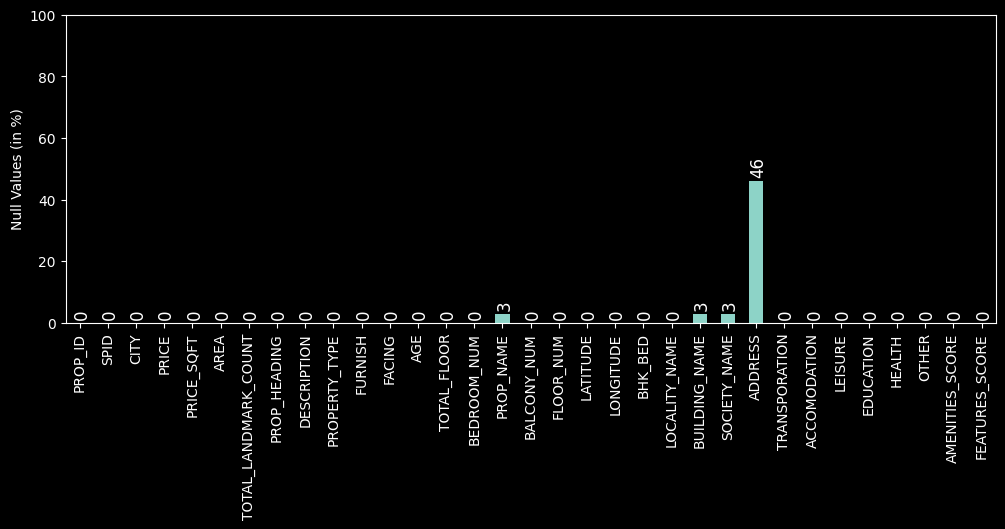

In [25]:
insights.null_plot(rent_apartment)

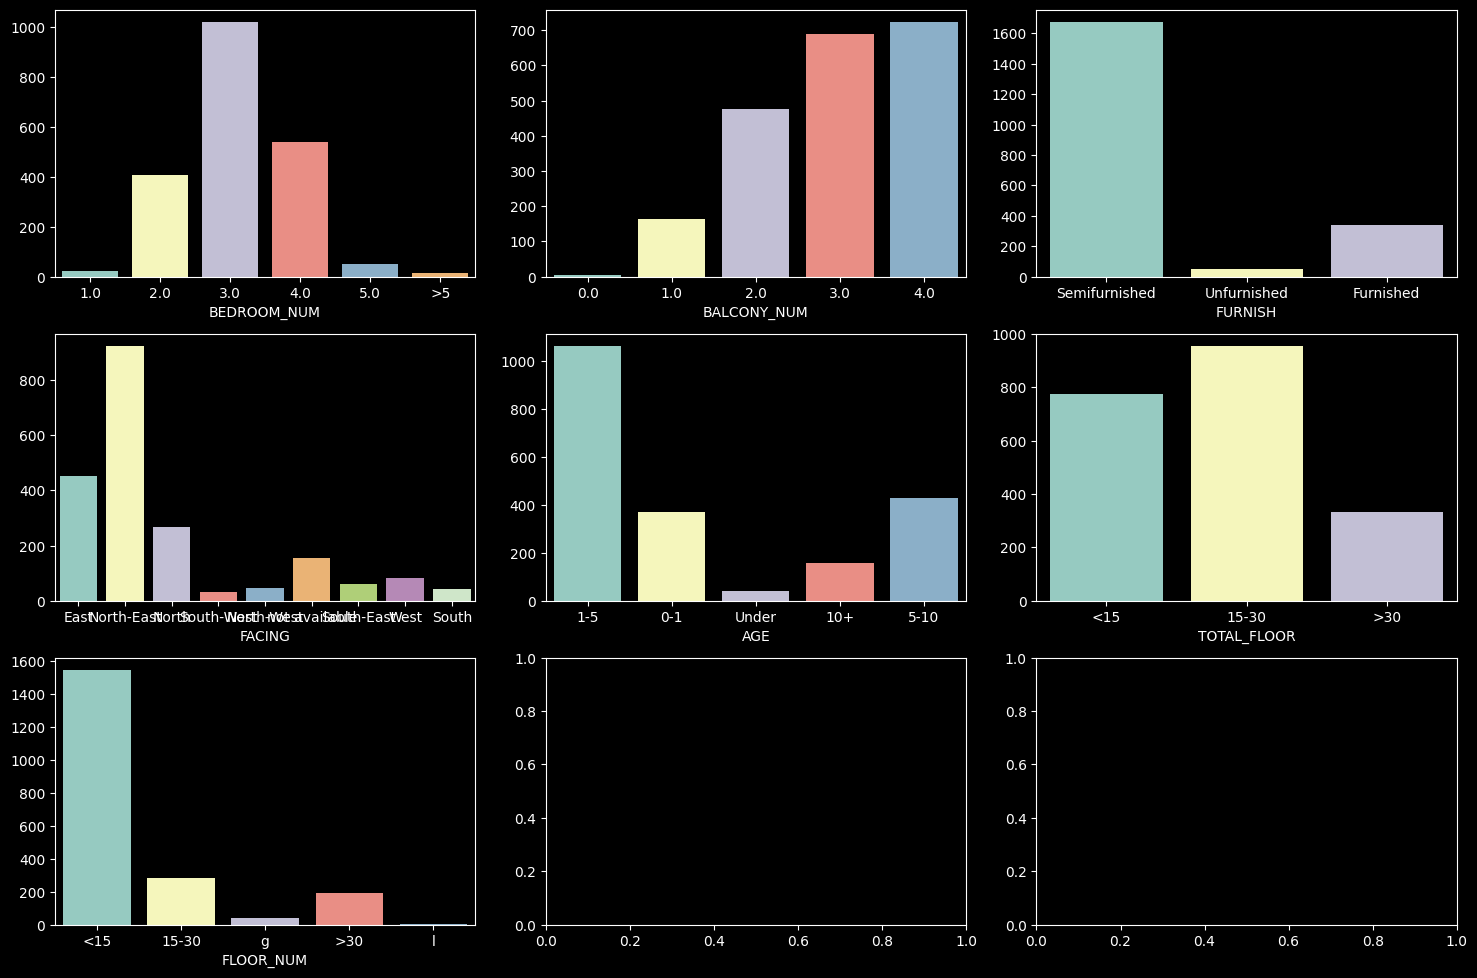

In [26]:
multivariate.count_plot(rent_apartment, cat_cols)

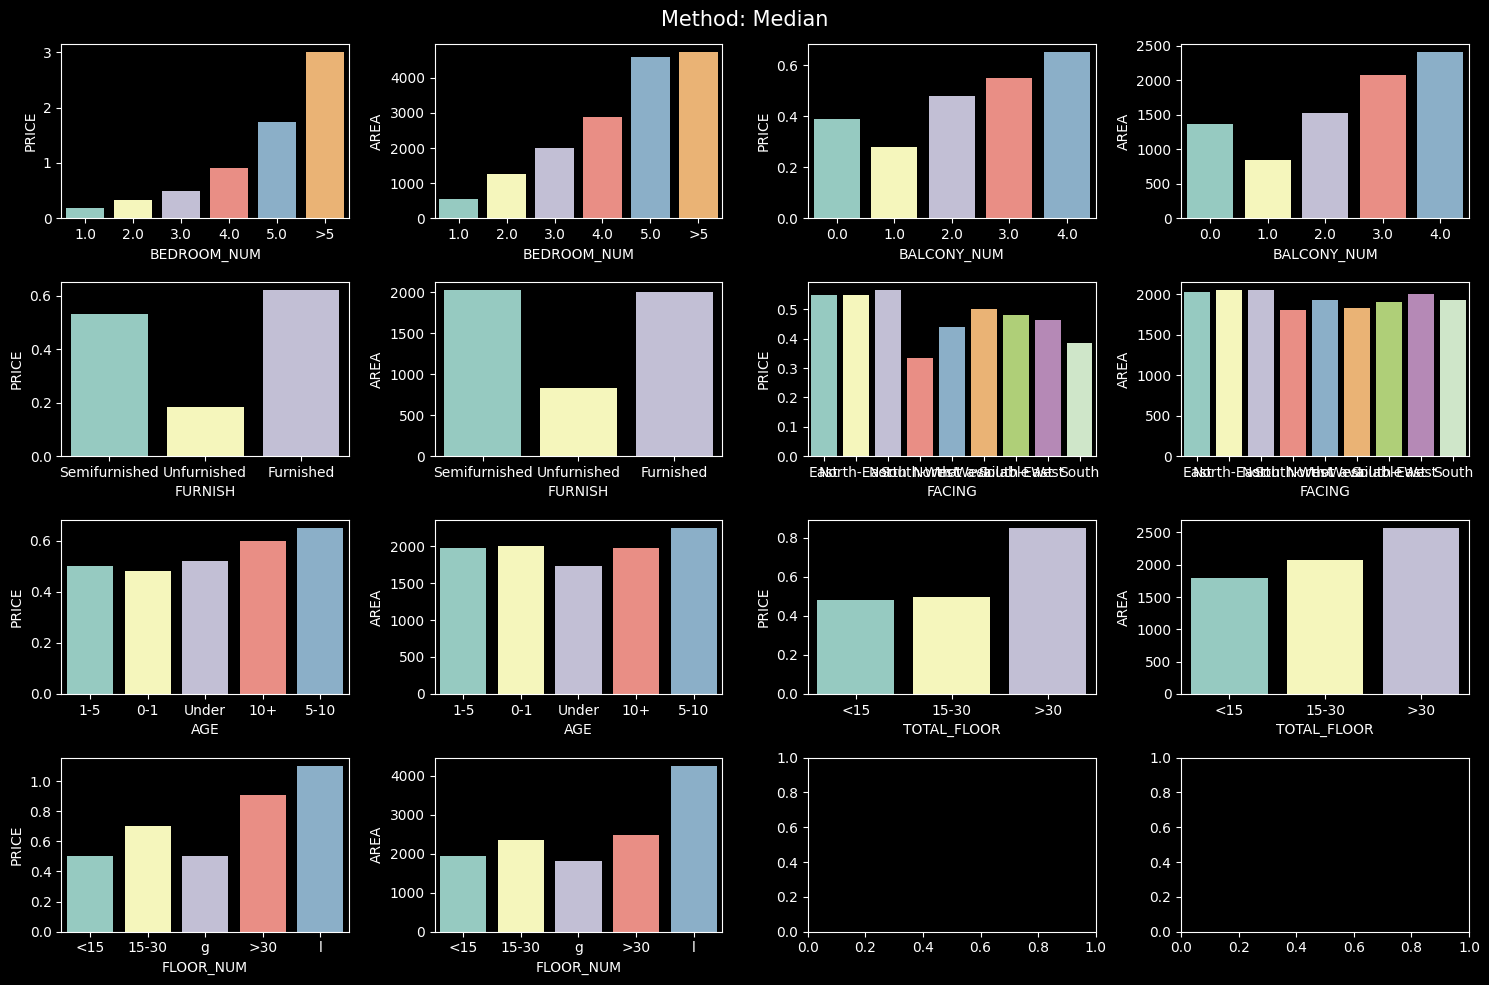

In [27]:
multivariate.agg_plot(rent_apartment, cat_cols, imp_cols, ["median"])

In [28]:
rent_apartment[imp_cols + num_cols].describe()

PRICE         AREA  AMENITIES_SCORE  FEATURES_SCORE
count  2060.000000  2060.000000      2060.000000     2060.000000
mean      0.787513  2223.694175        94.443689       43.915049
std       0.884590  1168.309579        40.002079       22.183264
min       0.055000   160.000000         0.000000        0.000000
25%       0.350000  1550.000000        55.000000       15.000000
50%       0.550000  2000.000000        99.000000       52.000000
75%       0.800000  2616.250000       136.000000       63.000000
max       9.000000  9198.000000       150.000000       72.000000

### PRICE / AREA

<Axes: xlabel='AREA', ylabel='PRICE'>

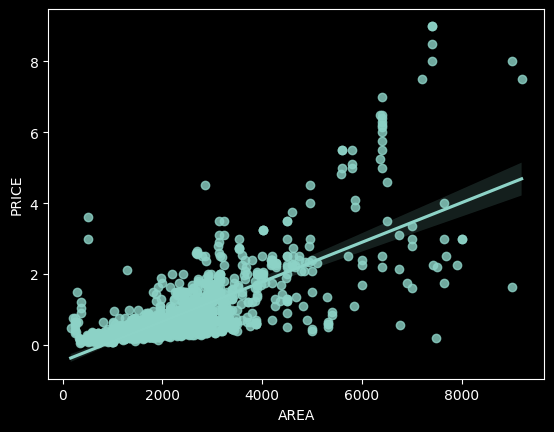

In [29]:
sns.regplot(rent_apartment, x="AREA", y="PRICE")

(2018, 33)


<Axes: xlabel='AREA', ylabel='PRICE'>

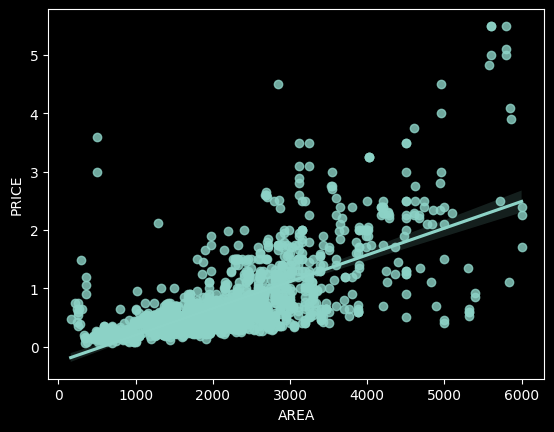

In [30]:
rent_apartment.query("PRICE<6 and AREA<6300", inplace=True)
print(rent_apartment.shape)
sns.regplot(rent_apartment, x="AREA", y="PRICE")

In [31]:
rent_apartment.query("PRICE>0.25 and AREA<500")

PROP_ID      SPID     CITY  PRICE  PRICE_SQFT  \
153   https://99acres.com/B70228700  70228700  gurgaon   0.27        56.0   
970   https://99acres.com/Z70731678  70731678  gurgaon   0.75       292.0   
1893  https://99acres.com/F71011250  71011250  gurgaon   0.35       139.0   
1905  https://99acres.com/T70206092  70206092  gurgaon   0.48       300.0   
1907  https://99acres.com/Q70915610  70915610  gurgaon   0.55       220.0   
1911  https://99acres.com/T70349082  70349082  gurgaon   0.60       240.0   
1914  https://99acres.com/C69998050  69998050  gurgaon   0.65       240.0   
1915  https://99acres.com/E70756122  70756122  gurgaon   0.65       270.0   
1927  https://99acres.com/X68517404  68517404  gurgaon   0.75       348.0   
1931  https://99acres.com/Y64002810  64002810  gurgaon   0.90       208.0   
1950  https://99acres.com/J70853710  70853710  gurgaon   1.49       519.0   
1991  https://99acres.com/W70871988  70871988  gurgaon   0.38       138.0   
1997  https://99acres.com/I69916178  69916178  gurgaon   0.43       179.0   
2011  https://99acres.com/Y70500386  70500386  gurgaon   0.65       209.0   
2027  https://99acres.com/A70833602  70833602  gurgaon   1.05       291.0   
2029  https://99acres.com/B70496240  70496240  gurgaon   1.20       333.0   

       AREA  TOTAL_LANDMARK_COUNT  \
153   482.0                  34.0   
970   256.0                  46.0   
1893  251.0                  12.0   
1905  160.0                  46.0   
1907  250.0                  47.0   
1911  250.0                  45.0   
1914  270.0                  12.0   
1915  240.0                  44.0   
1927  215.0                  46.0   
1931  360.0                  44.0   
1950  287.0                  15.0   
1991  275.0                  45.0   
1997  240.0                   3.0   
2011  311.0                  46.0   
2027  360.0                  46.0   
2029  360.0                  46.0   

                                        PROP_HEADING  \
153                  2 bhk flat in sector 69 gurgaon   
970                2 bhk flat in sushant lok phase 1   
1893            3 bedroom house in sector 67 gurgaon   
1905                   3 bedroom house in ardee city   
1907            4 bedroom house in sector 50 gurgaon   
1911            3 bedroom house in sector 57 gurgaon   
1914            3 bedroom house in sector 60 gurgaon   
1915              3 bedroom house in nirvana country   
1927  3 bedroom house in c block sushant lok phase 1   
1931              3 bedroom house in nirvana country   
1950            3 bedroom house in sector 48 gurgaon   
1991            3 bedroom house in sector 50 gurgaon   
1997            3 bedroom house in sector 82 gurgaon   
2011              4 bedroom house in uppals southend   
2027              4 bedroom house in nirvana country   
2029              3 bedroom house in nirvana country   

                                            DESCRIPTION   PROPERTY_TYPE  ...  \
153   this 2 bhk flat in sector 69 gurgaon is availa...  Rent Apartment  ...   
970   gurgaon's most popular society sushant lok 1 b...  Rent Apartment  ...   
1893  rent this beautiful 3 bhk house in gurgaon's m...  Rent Apartment  ...   
1905  gurgaon's most popular society, offers 3 bhk h...  Rent Apartment  ...   
1907  find this 4 bhk house for rent in sector 50 gu...  Rent Apartment  ...   
1911  this 3 bhk house for rent in sector 57 gurgaon...  Rent Apartment  ...   
1914  available for rent adani samsara for rent corn...  Rent Apartment  ...   
1915  3 bhk plus servant room independence villa for...  Rent Apartment  ...   
1927                    4 bhk flat in rent in sus lok 1  Rent Apartment  ...   
1931  broker's please excuse... villa available for ...  Rent Apartment  ...   
1950  hii, this is fully furnished independent villa...  Rent Apartment  ...   
1991  south city 2 sector 49 3bhk very loction  park...  Rent Apartment  ...   
1997  3 bhk semi furnished with ac and modular kitch...  Rent Apartment  ...   
2011  fully fur

### PRICE / PRICE_SQFT

<Axes: xlabel='PRICE_SQFT', ylabel='PRICE'>

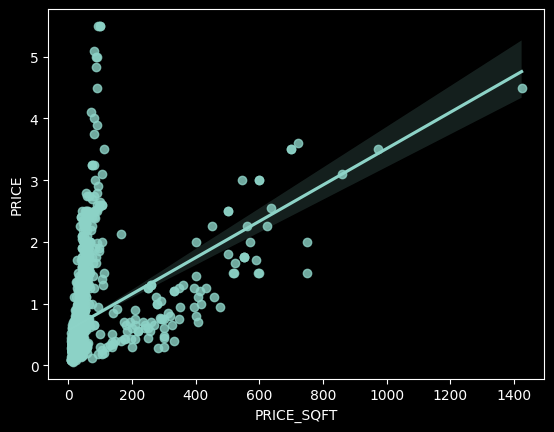

In [32]:
sns.regplot(rent_apartment, x="PRICE_SQFT", y="PRICE")

Koi sense hai iss feature ka.. {•_•}

### PRICE / AMENITIES_SCORE

<Axes: xlabel='AMENITIES_SCORE', ylabel='PRICE'>

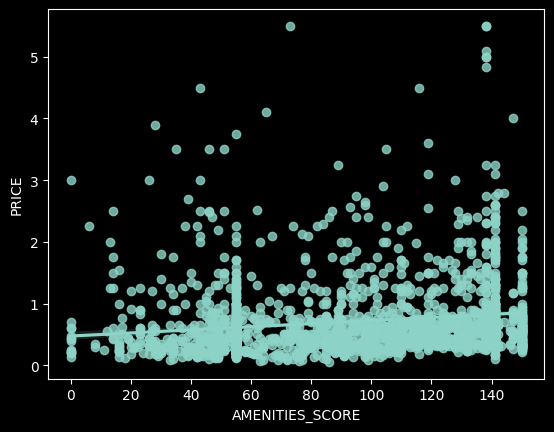

In [33]:
sns.regplot(rent_apartment, x="AMENITIES_SCORE", y="PRICE")

### PRICE / FEATURES_SCORE

<Axes: xlabel='FEATURES_SCORE', ylabel='PRICE'>

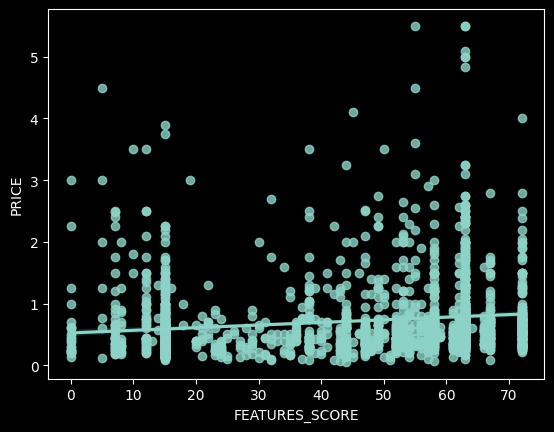

In [34]:
sns.regplot(rent_apartment, x="FEATURES_SCORE", y="PRICE")

### LOCALITY_NAME

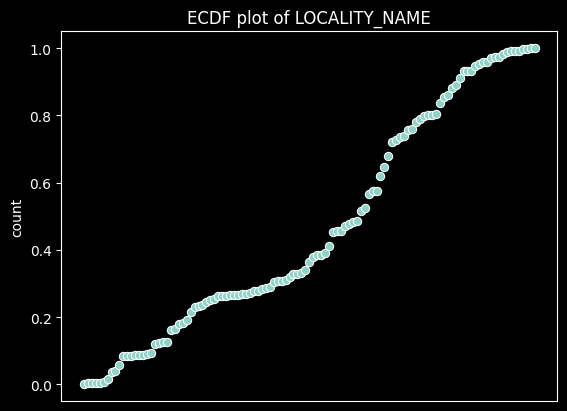

In [35]:
plt.xticks([])
univariate.ecdf_plot(rent_apartment["LOCALITY_NAME"])

In [36]:
rent_apartment["LOCALITY_NAME"].nunique()

115

In [37]:
rent_apartment["LOCALITY_NAME"].value_counts()[:10]

LOCALITY_NAME
sector 65 gurgaon     87
sector 67a gurgaon    87
sector 62 gurgaon     86
sector 54 gurgaon     82
sector 102 gurgaon    72
sector 81 gurgaon     67
sector 67 gurgaon     67
dlf phase 5           57
sector 60 gurgaon     55
sector 66 gurgaon     55
Name: count, dtype: int64

<Axes: xlabel='LOCALITY_NAME', ylabel='PRICE'>

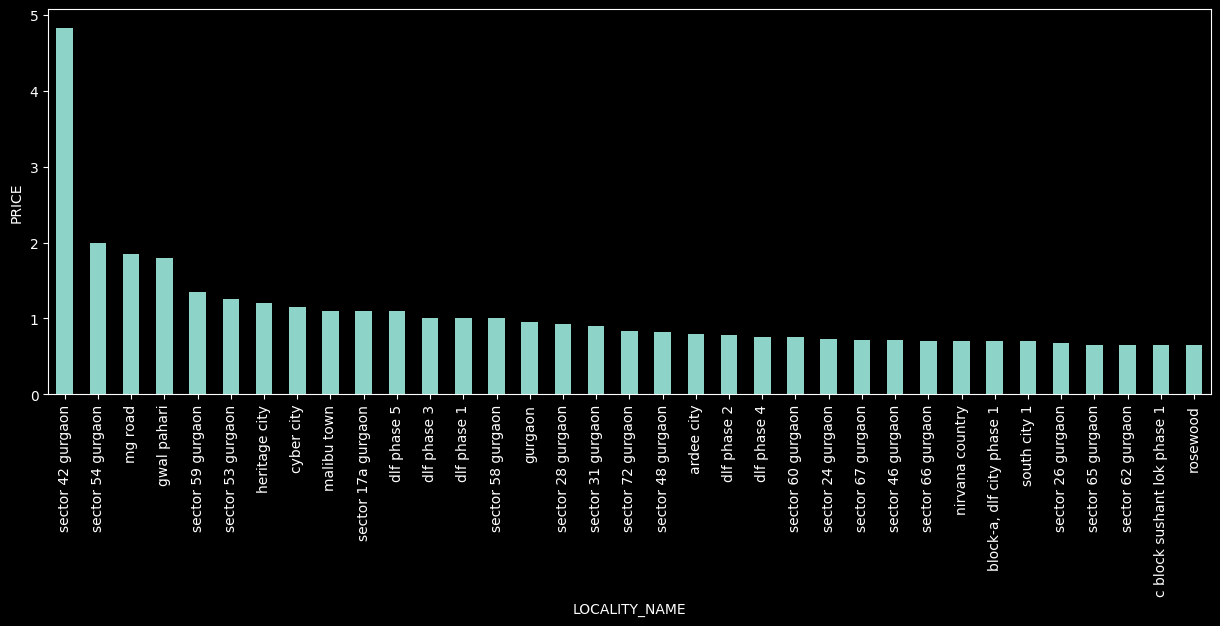

In [38]:
(
    rent_apartment.groupby("LOCALITY_NAME")["PRICE"]
    .median()
    .sort_values(ascending=False)[:35]
    .plot.bar(figsize=(15, 5), ylabel="PRICE")
)

## Independent Floors

In [39]:
print(ind_floor.shape)
ind_floor.head()

(1816, 33)


PROP_ID      SPID     CITY  PRICE  PRICE_SQFT  \
0  https://99acres.com/B71021026  71021026  gurgaon  17.25      2422.0   
1  https://99acres.com/J66486956  66486956  gurgaon  32.00      3137.0   
2  https://99acres.com/S66486900  66486900  gurgaon  33.00      3473.0   
3  https://99acres.com/Z54395592  54395592  gurgaon  35.00      3890.0   
4  https://99acres.com/P53721828  53721828  gurgaon  35.00      3888.0   

     AREA  TOTAL_LANDMARK_COUNT  \
0   712.0                  13.0   
1  1020.0                  15.0   
2   950.0                  15.0   
3   900.0                  49.0   
4   900.0                  48.0   

                                        PROP_HEADING  \
0  2 bhk independent builder floor in sector 63 g...   
1   3 bhk independent builder floor in rajendra park   
2   3 bhk independent builder floor in rajendra park   
3  2 bhk independent builder floor in ashok vihar...   
4    2 bhk independent builder floor in hans enclave   

                                         DESCRIPTION PROPERTY_TYPE  ...  \
0  brand new builder floor available for sale in ...     Ind Floor  ...   
1  property near to gurgaon railway modular kitch...     Ind Floor  ...   
2  property near to gurgaon railway modular kitch...     Ind Floor  ...   
3  why pay rent get ready to move fully furnished...     Ind Floor  ...   
4  why pay rent get ready to move fully furnished...     Ind Floor  ...   

                  SOCIETY_NAME ADDRESS TRANSPORATION ACCOMODATION LEISURE  \
0  adani brahma samsara vilasa     NaN           3.0          2.0     4.0   
1       rana affordable floors     NaN           2.0          2.0     5.0   
2       rana affordable floors     NaN           2.0          2.0     5.0   
3                          NaN     NaN           0.0          1.0     0.0   
4            new builder floor     NaN           0.0          0.0     2.0   

  EDUCATION  HEALTH OTHER  AMENITIES_SCORE  FEATURES_SCORE  
0       2.0     1.0   1.0               91              36  
1       4.0     0.0   2.0               24              12  
2       4.0     0.0   2.0               24              12  
3       0.0    35.0   2.0               34              17  
4       0.0    41.0   3.0               34              17  

[5 rows x 33 columns]

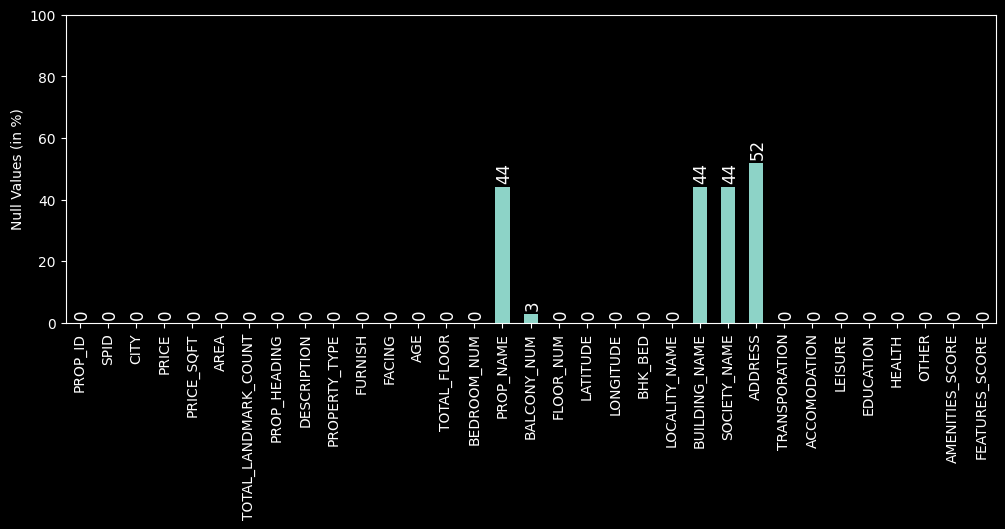

In [40]:
insights.null_plot(ind_floor)

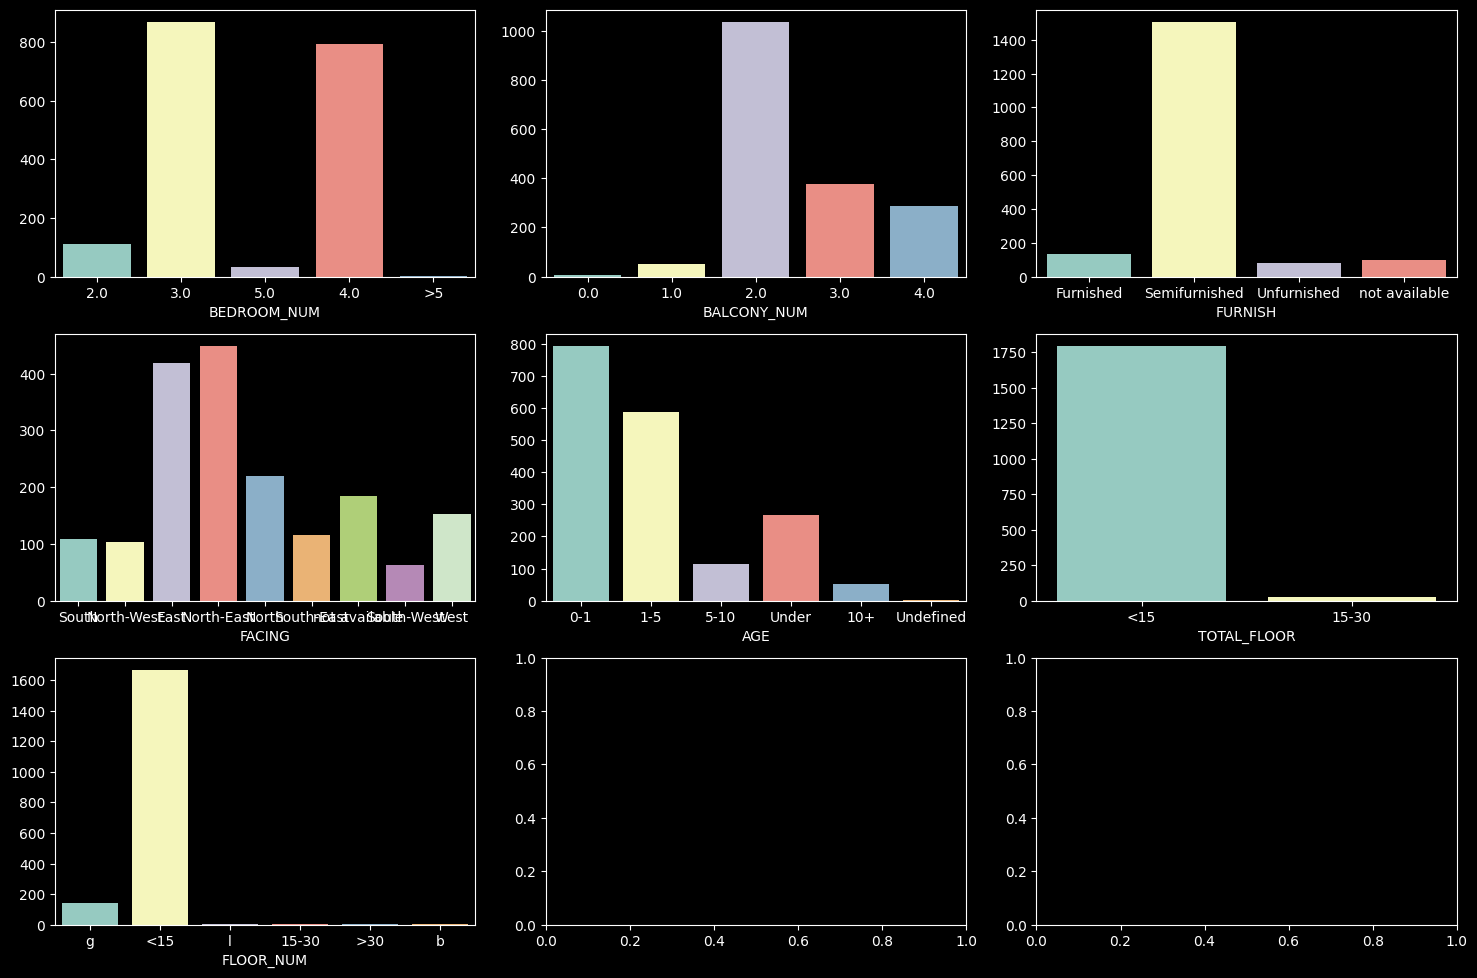

In [41]:
multivariate.count_plot(ind_floor, cat_cols)

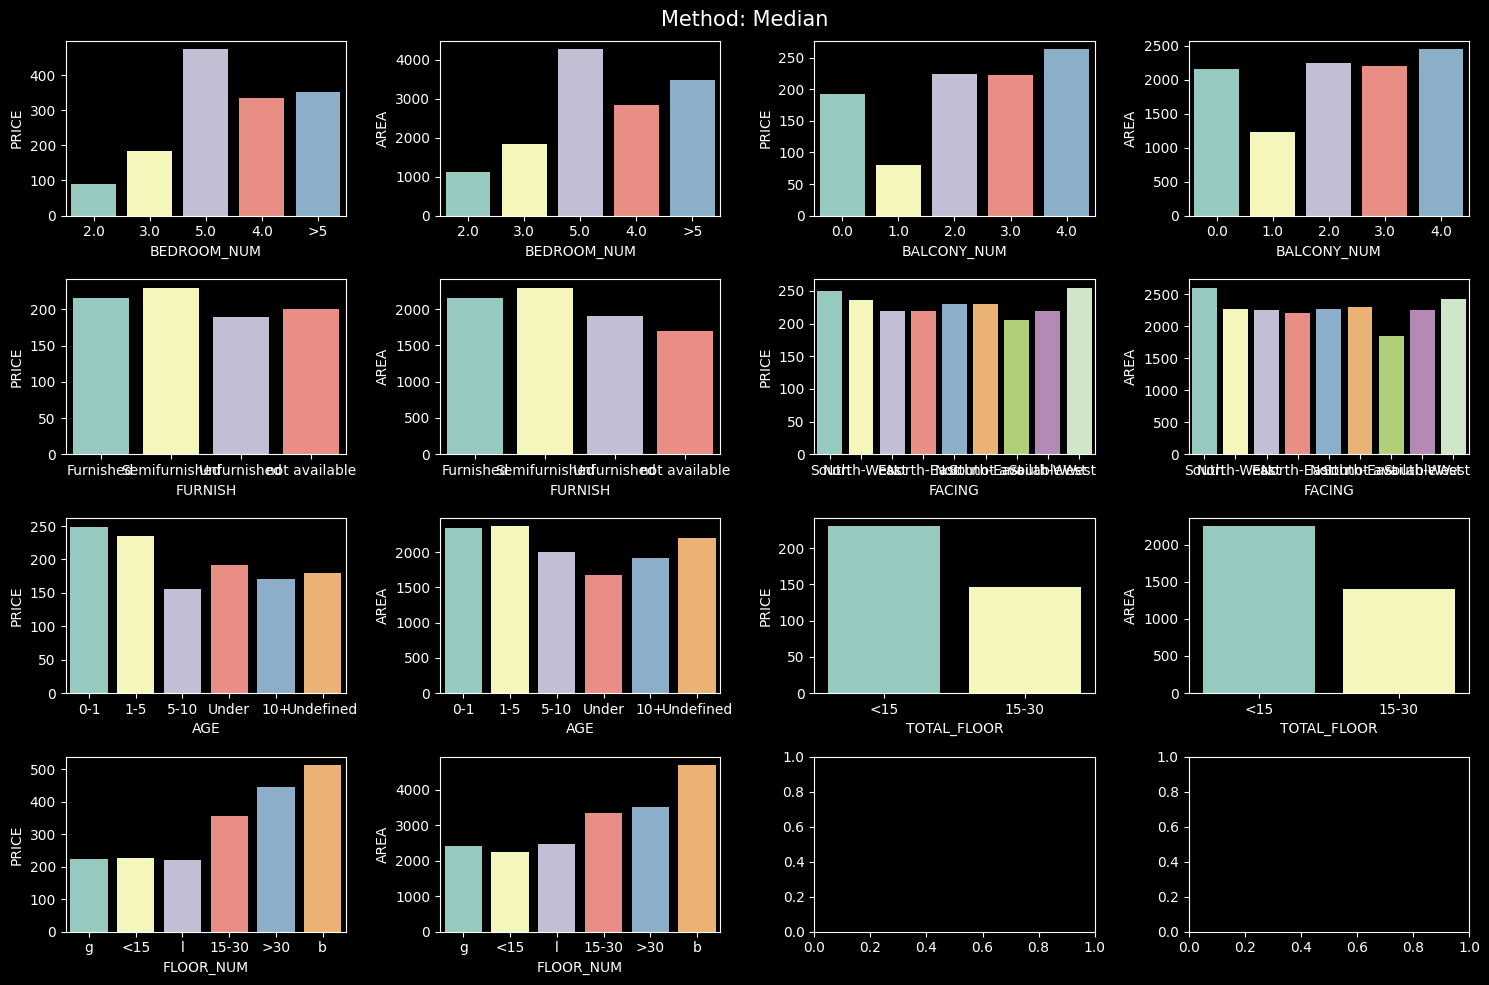

In [42]:
multivariate.agg_plot(ind_floor, cat_cols, imp_cols, ["median"])

In [43]:
ind_floor[imp_cols + num_cols].describe()

PRICE         AREA  AMENITIES_SCORE  FEATURES_SCORE
count  1816.000000  1816.000000      1816.000000     1816.000000
mean    261.958947  2394.109581        62.251652       26.623348
std     152.324102  1012.960323        36.660861       18.928812
min      17.250000    30.000000         0.000000        0.000000
25%     170.000000  1700.750000        35.000000       12.000000
50%     228.500000  2250.000000        53.000000       20.000000
75%     335.000000  2800.000000        88.000000       43.000000
max    1850.000000  9198.000000       134.000000       63.000000

### PRICE / AREA

<Axes: xlabel='AREA', ylabel='PRICE'>

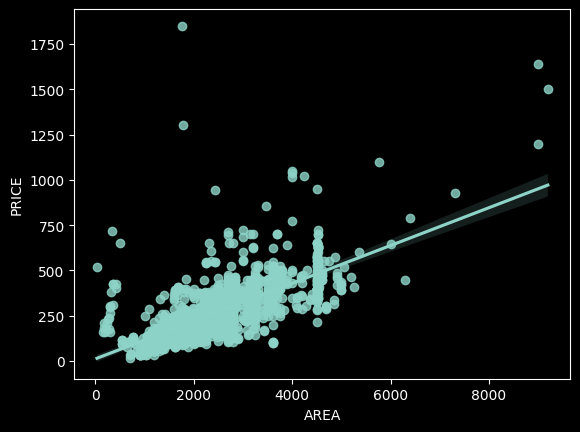

In [44]:
sns.regplot(ind_floor, x="AREA", y="PRICE")

(1802, 33)


<Axes: xlabel='AREA', ylabel='PRICE'>

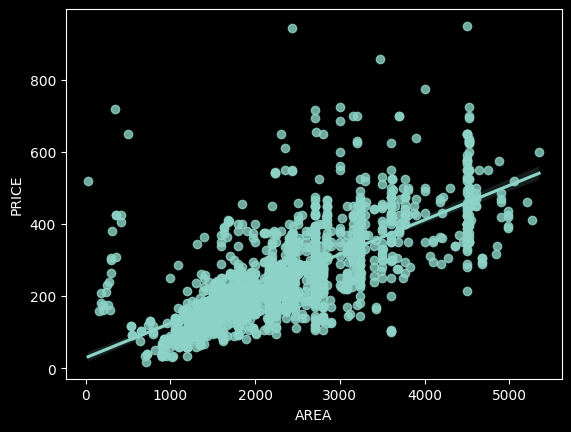

In [45]:
ind_floor.query("PRICE<1000 and AREA<6000", inplace=True)
print(ind_floor.shape)
sns.regplot(ind_floor, x="AREA", y="PRICE")

In [46]:
# These are true properties with
# AGE: 0-5 Year
# And much more important features
ind_floor.query("AREA<500")

PROP_ID      SPID     CITY  PRICE  PRICE_SQFT  \
378   https://99acres.com/E70834394  70834394  gurgaon  159.0    883333.0   
403   https://99acres.com/A70515048  70515048  gurgaon  160.0     80000.0   
404   https://99acres.com/A70799710  70799710  gurgaon  160.0     54794.0   
491   https://99acres.com/M70931608  70931608  gurgaon  175.0     66037.0   
502   https://99acres.com/Y70392556  70392556  gurgaon  175.0     85784.0   
525   https://99acres.com/W69668084  69668084  gurgaon  180.0    101694.0   
752   https://99acres.com/P69821272  69821272  gurgaon  209.0    116111.0   
764   https://99acres.com/B69821458  69821458  gurgaon  210.0     87500.0   
937   https://99acres.com/R69823164  69823164  gurgaon  230.0     92000.0   
969   https://99acres.com/F58663354  58663354  gurgaon  238.0     84697.0   
1153  https://99acres.com/E68426364  68426364  gurgaon  265.0     87748.0   
1288  https://99acres.com/B70930496  70930496  gurgaon  300.0    100000.0   
1293  https://99acres.com/Z70928810  70928810  gurgaon  305.0    101666.0   
1301  https://99acres.com/I70936036  70936036  gurgaon  309.0     85833.0   
1510  https://99acres.com/T66341958  66341958  gurgaon  380.0    120253.0   
1566  https://99acres.com/Q70935272  70935272  gurgaon  405.0     96658.0   
1601  https://99acres.com/Q70880430  70880430  gurgaon  425.0    118055.0   
1603  https://99acres.com/P70935484  70935484  gurgaon  425.0    101431.0   
1608  https://99acres.com/Z70936804  70936804  gurgaon  425.0    118055.0   
1726  https://99acres.com/K70797438  70797438  gurgaon  520.0   1733333.0   
1797  https://99acres.com/O70468532  70468532  gurgaon  720.0    208695.0   

       AREA  TOTAL_LANDMARK_COUNT  \
378   162.0                  45.0   
403   200.0                  45.0   
404   292.0                   4.0   
491   265.0                  47.0   
502   204.0                  45.0   
525   177.0                   7.0   
752   180.0                   7.0   
764   240.0                  10.0   
937   250.0                  10.0   
969   281.0                  27.0   
1153  302.0                  45.0   
1288  300.0                  46.0   
1293  300.0                  46.0   
1301  360.0                  48.0   
1510  316.0                  44.0   
1566  419.0                  46.0   
1601  360.0                  48.0   
1603  419.0                  46.0   
1608  360.0                  48.0   
1726   30.0                  46.0   
1797  345.0                   8.0   

                                           PROP_HEADING  \
378   3 bhk independent builder floor in sushant lok...   
403   3 bhk independent builder floor in sector 57 g...   
404   3 bhk independent builder floor in sector 47 g...   
491   3 bhk independent builder floor in sushant lok...   
502   3 bhk independent builder floor in sector 57 g...   
525   3 bhk independent builder floor in sector 63a ...   
752   3 bhk independent builder floor in sector 63a ...   
764   3 bhk independent builder floor in sector 63a ...   
937   3 bhk independent builder floor in sector 63a ...   
969      3 bhk independent builder floor in palam vihar   
1153  3 bhk independent builder floor in block b sec...   
1288  4 bhk independent builder floor in c block sus...   
1293  4 bhk independent builder floor in c block sus...   
1301  4 bhk independent builder floor in a block sus...   
1510     4 bhk independent builder floor in dlf phase 2   
1566  4 bhk independent builder floor in c block sus...   
1601  4 bhk independent builder floor in sector 45 g...   
1603  4 bhk independent builder floor in c block sus...   
1608  4 bhk independent builder floor in a block sus...   
1726     4 bhk independent builder floor in dlf phase 1   
1797     4 bhk independent builder floor in dlf phase 5   

                                            DESCRIPTION PROPERTY_TYPE  ...  \
378   planning to purchase dream house in gurgaon? t...     Ind Floor  ...   
403   builder floor for sale good construction and g...     Ind

### PRICE / PRICE_SQFT

<Axes: xlabel='PRICE_SQFT', ylabel='PRICE'>

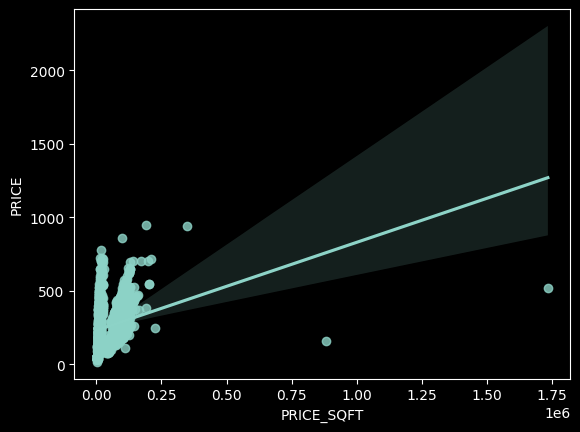

In [47]:
sns.regplot(ind_floor, x="PRICE_SQFT", y="PRICE")

<Axes: xlabel='PRICE_SQFT', ylabel='PRICE'>

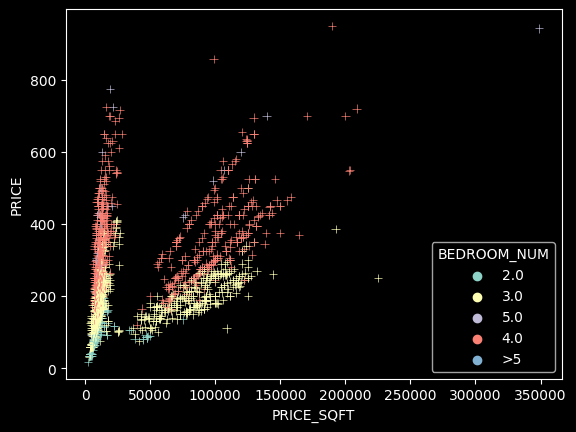

In [48]:
sns.scatterplot(
    ind_floor.query("PRICE_SQFT<5_00_000"),
    x="PRICE_SQFT",
    y="PRICE",
    hue="BEDROOM_NUM",
    marker="+",
)

### PRICE / AMENITIES_SCORE

<Axes: xlabel='AMENITIES_SCORE', ylabel='PRICE'>

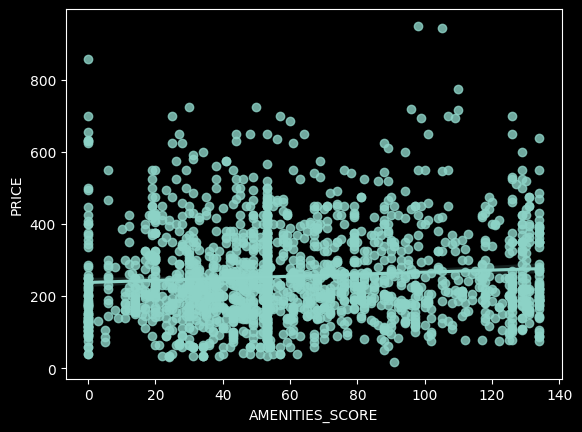

In [49]:
sns.regplot(ind_floor, x="AMENITIES_SCORE", y="PRICE")

### PRICE / FEATURES_SCORE

<Axes: xlabel='FEATURES_SCORE', ylabel='PRICE'>

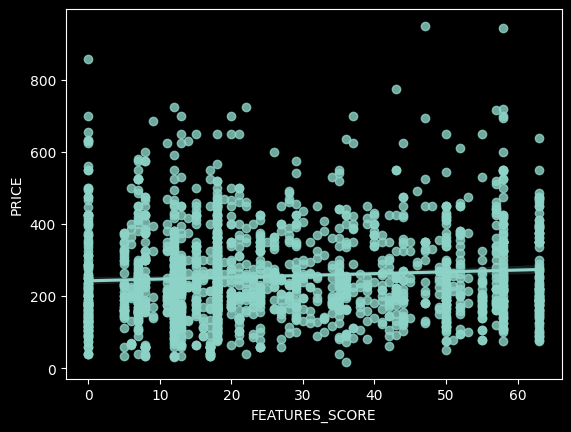

In [50]:
sns.regplot(ind_floor, x="FEATURES_SCORE", y="PRICE")

### LOCALITY_NAME

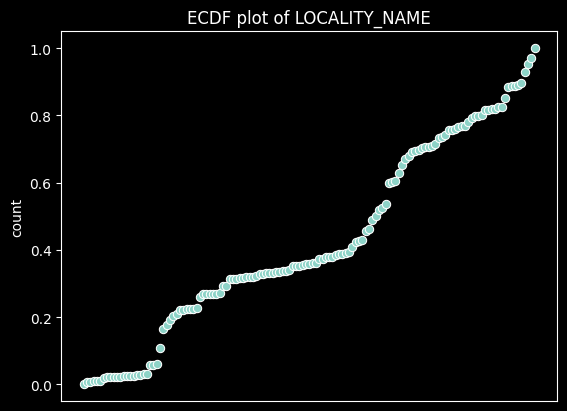

In [51]:
plt.xticks([])
univariate.ecdf_plot(ind_floor["LOCALITY_NAME"])

In [52]:
ind_floor["LOCALITY_NAME"].nunique()

137

In [53]:
ind_floor["LOCALITY_NAME"].value_counts()[:10]

LOCALITY_NAME
sector 57 gurgaon              115
dlf phase 2                    105
dlf phase 1                     84
malibu town                     61
sushant lok phase 1             60
south city 2                    59
uppals southend                 52
south city 1                    51
c block sushant lok phase 1     50
sector 48 gurgaon               47
Name: count, dtype: int64

<Axes: xlabel='LOCALITY_NAME', ylabel='PRICE'>

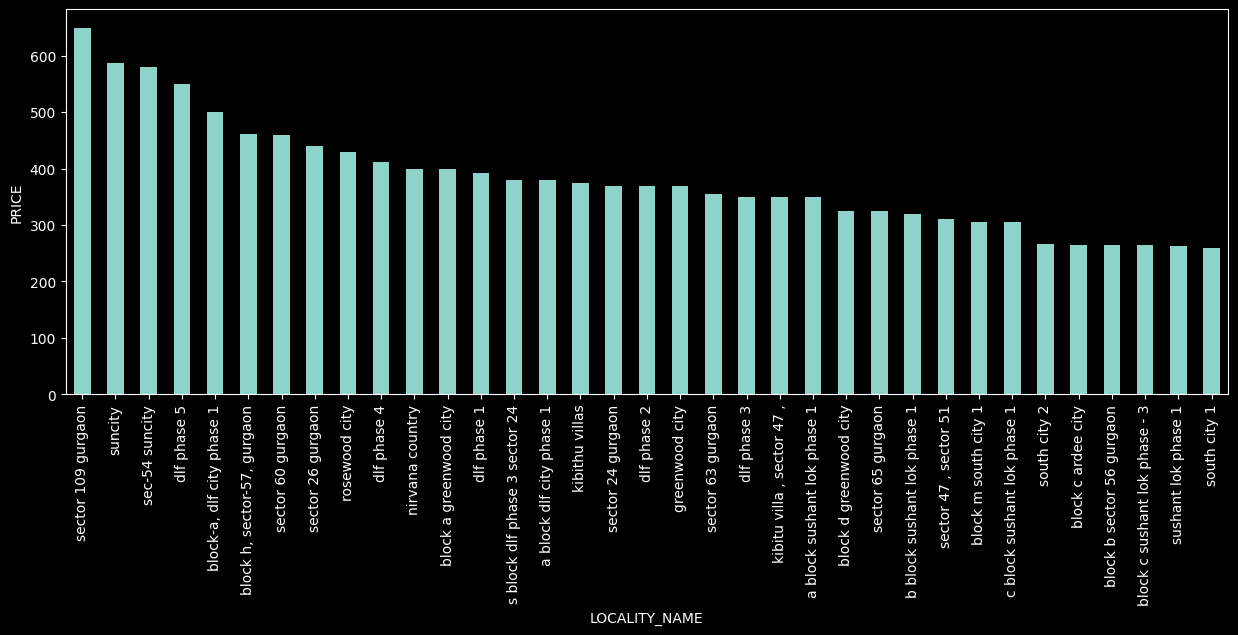

In [54]:
(
    ind_floor.groupby("LOCALITY_NAME")["PRICE"]
    .median()
    .sort_values(ascending=False)[:35]
    .plot.bar(figsize=(15, 5), ylabel="PRICE")
)

## Independent House

In [55]:
print(ind_house.shape)
ind_house.head()

(433, 33)


PROP_ID      SPID     CITY  PRICE  PRICE_SQFT  \
0  https://99acres.com/I70921750  70921750  gurgaon    6.0      1200.0   
1  https://99acres.com/Y70723708  70723708  gurgaon    6.0      1200.0   
2  https://99acres.com/S70845522  70845522  gurgaon   12.0      2181.0   
3  https://99acres.com/C70921432  70921432  gurgaon   12.5      2500.0   
4  https://99acres.com/R69802250  69802250  gurgaon   36.0     78260.0   

     AREA  TOTAL_LANDMARK_COUNT                             PROP_HEADING  \
0  4500.0                  49.0    36 bedroom house in sector 39 gurgaon   
1  4500.0                  47.0    18 bedroom house in sector 46 gurgaon   
2  4950.0                  48.0    35 bedroom house in sector 45 gurgaon   
3  4500.0                  48.0    35 bedroom house in sector 45 gurgaon   
4   414.0                  49.0  2 bedroom house in laxman vihar phase 2   

                                         DESCRIPTION PROPERTY_TYPE  ...  \
0  luxury furnished guest house with basement   3...     Ind House  ...   
1  18 bhk luxury furnished main 60 meter road in ...     Ind House  ...   
2  luxury furnished guest house with basement 35 ...     Ind House  ...   
3  luxury furnished guest house with basement  35...     Ind House  ...   
4  near by railways station near by market near b...     Ind House  ...   

    SOCIETY_NAME    ADDRESS TRANSPORATION ACCOMODATION LEISURE EDUCATION  \
0     sector 39   sector 39           0.0          9.0     3.0       0.0   
1  rwa sector 46  sector 46           0.0         10.0     1.0       0.0   
2            NaN  sector 45           1.0         11.0     1.0       1.0   
3      sector 45  sector 45           1.0         11.0     1.0       1.0   
4            NaN        NaN           0.0          1.0     0.0       0.0   

   HEALTH OTHER  AMENITIES_SCORE  FEATURES_SCORE  
0    15.0   3.0                6               0  
1    15.0   2.0               31               0  
2    14.0   1.0               38               0  
3    14.0   1.0               14               0  
4    37.0   1.0               18               0  

[5 rows x 33 columns]

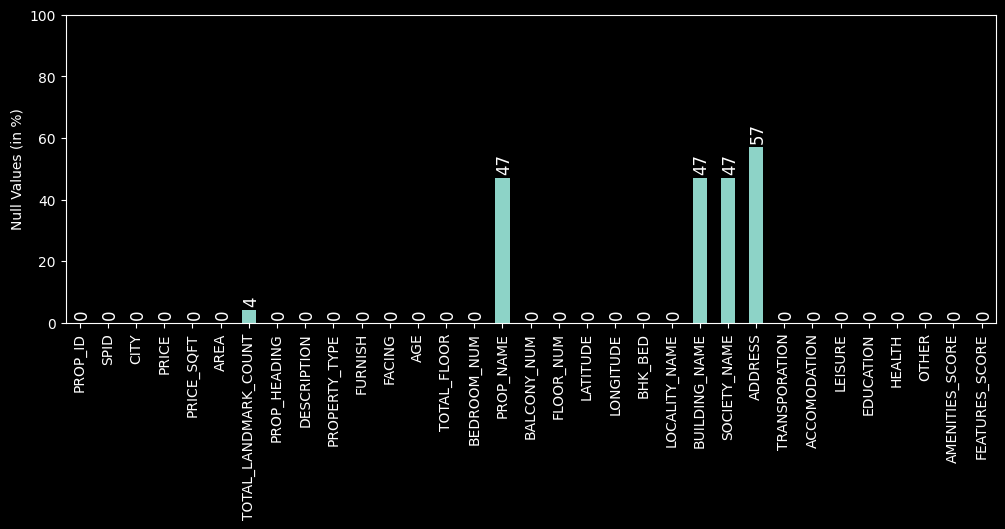

In [56]:
insights.null_plot(ind_house)

Independent Houses have most of the missing values in property names and addresses which are not a important feature for model building.

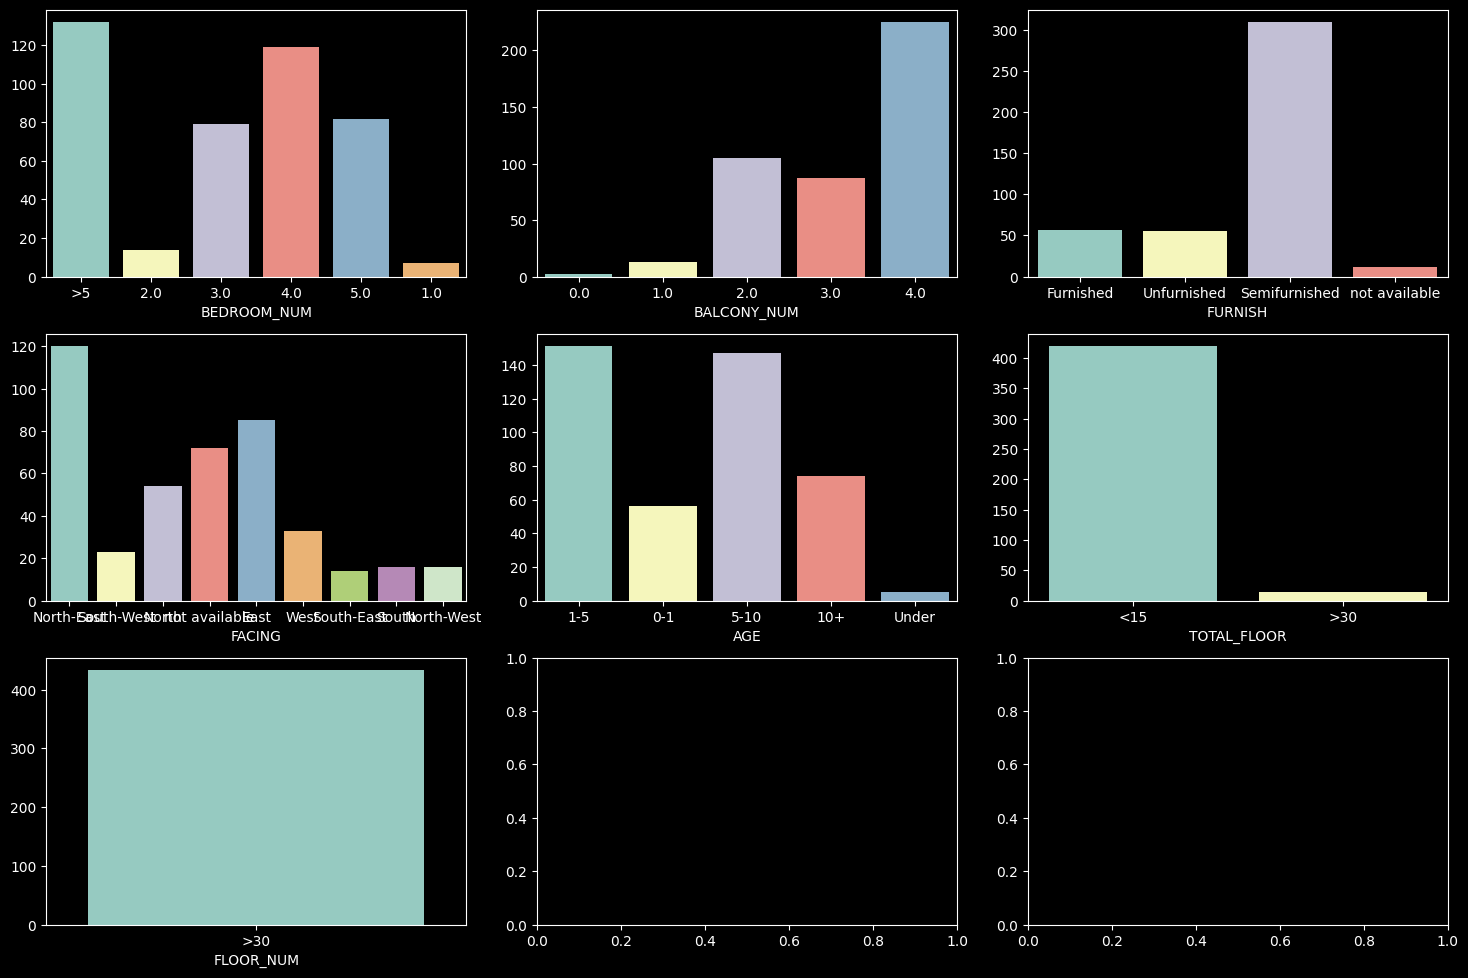

In [57]:
multivariate.count_plot(ind_house, cat_cols)

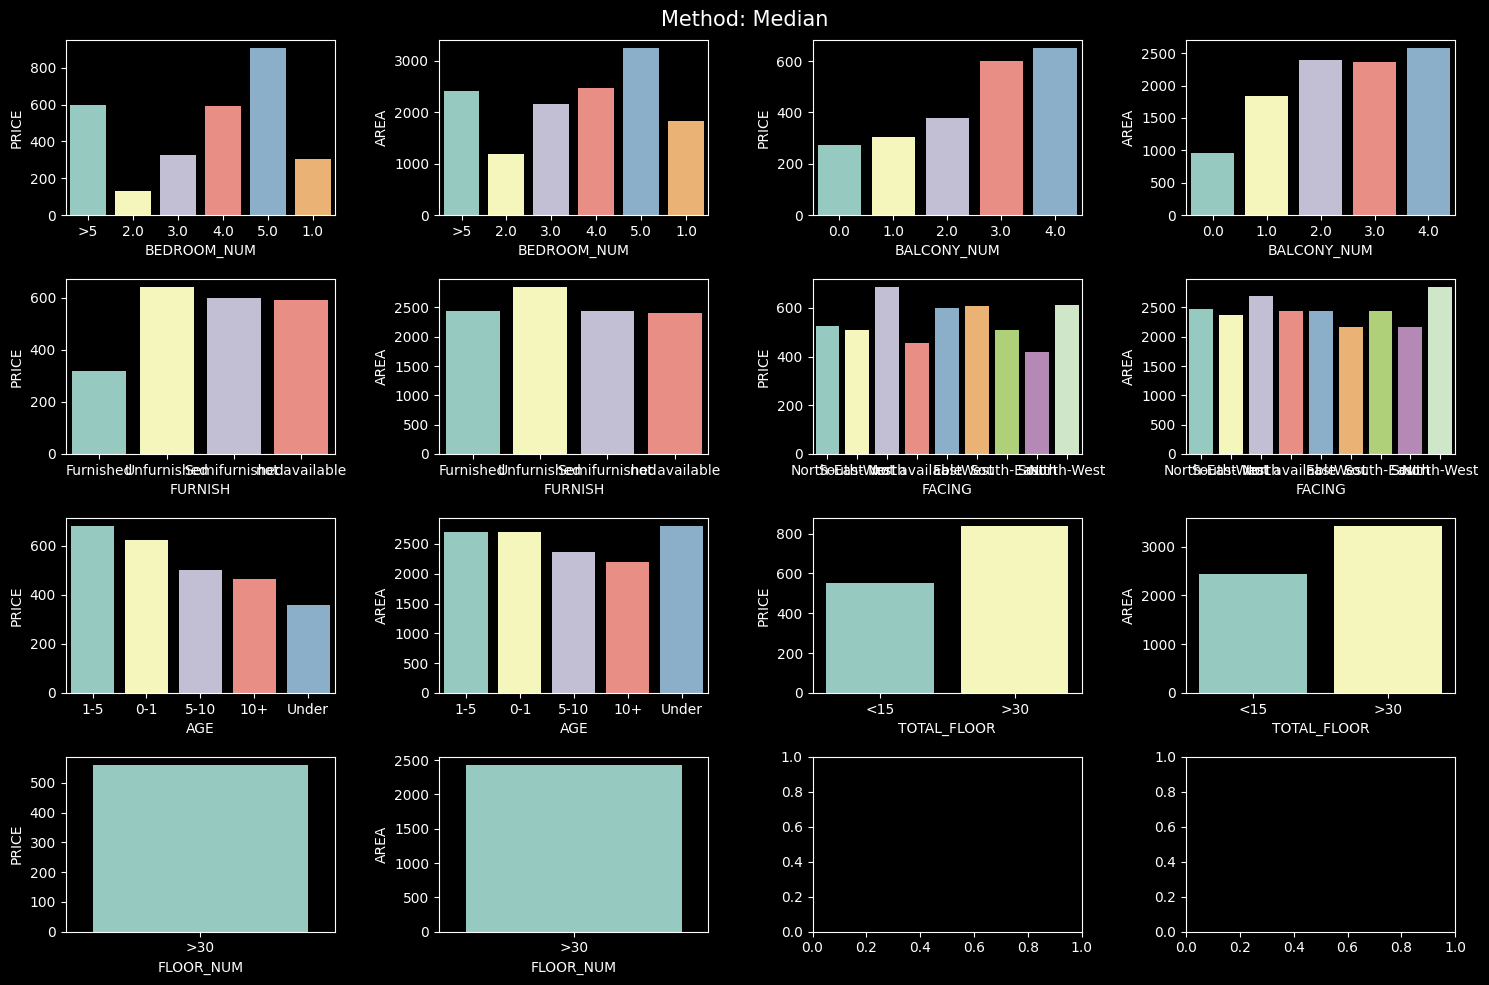

In [58]:
multivariate.agg_plot(ind_house, cat_cols, imp_cols, ["median"])

In [59]:
ind_house[imp_cols + num_cols].describe()

PRICE         AREA  AMENITIES_SCORE  FEATURES_SCORE
count   433.000000   433.000000       433.000000      433.000000
mean    640.837182  2756.810624        57.482679       23.644342
std     422.161487  1780.288040        33.896292       18.249253
min       6.000000   122.000000         0.000000        0.000000
25%     320.000000  1620.000000        31.000000       11.000000
50%     560.000000  2430.000000        51.000000       18.000000
75%     850.000000  3240.000000        82.000000       42.000000
max    2500.000000  9500.000000       119.000000       55.000000

### PRICE / AREA

<Axes: xlabel='AREA', ylabel='PRICE'>

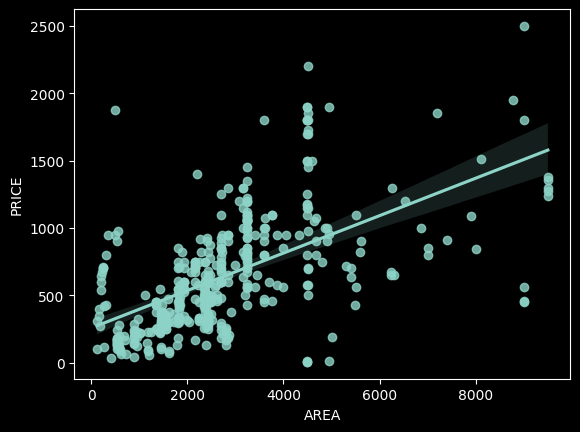

In [60]:
sns.regplot(ind_house, x="AREA", y="PRICE")

> Looks very scatter around the whole graph. But this _maybe_ works. (•_-)

### PRICE / PRICE_SQFT

<Axes: xlabel='PRICE_SQFT', ylabel='PRICE'>

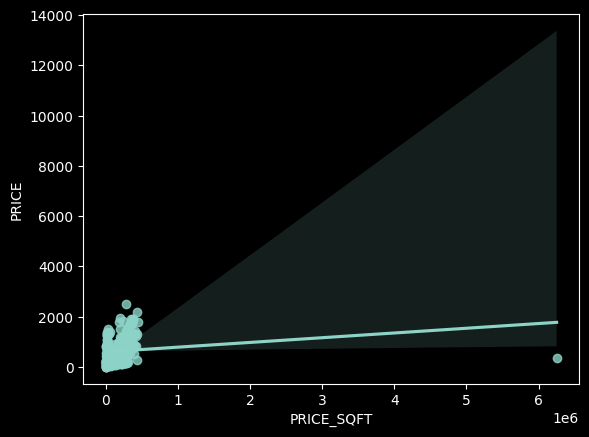

In [61]:
sns.regplot(ind_house, x="PRICE_SQFT", y="PRICE")

<Axes: xlabel='PRICE_SQFT', ylabel='PRICE'>

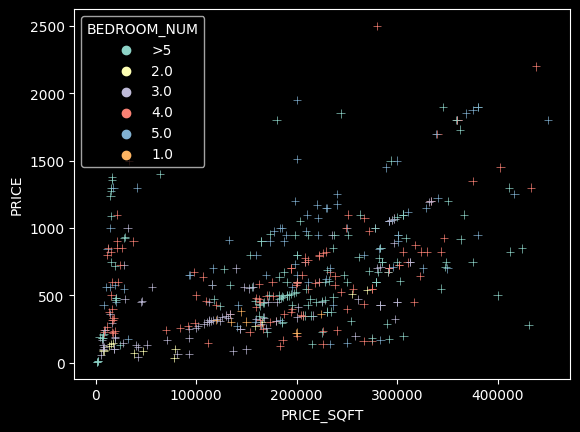

In [62]:
sns.scatterplot(
    ind_house.query("PRICE_SQFT<@C.TEN_LAC"),
    x="PRICE_SQFT",
    y="PRICE",
    hue="BEDROOM_NUM",
    marker="+",
)

### PRICE / AMENITIES_SCORE

<Axes: xlabel='AMENITIES_SCORE', ylabel='PRICE'>

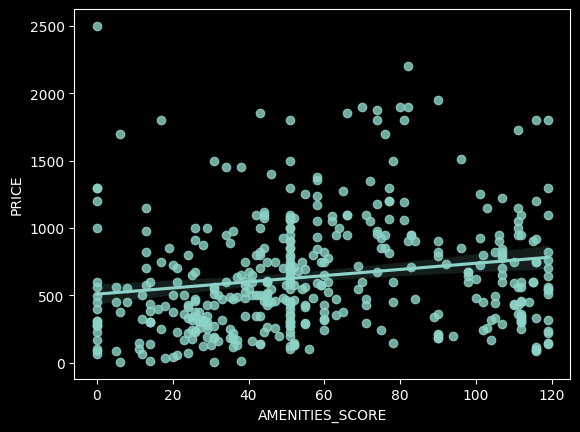

In [63]:
sns.regplot(ind_house, x="AMENITIES_SCORE", y="PRICE")

### PRICE / FEATURES_SCORE

<Axes: xlabel='FEATURES_SCORE', ylabel='PRICE'>

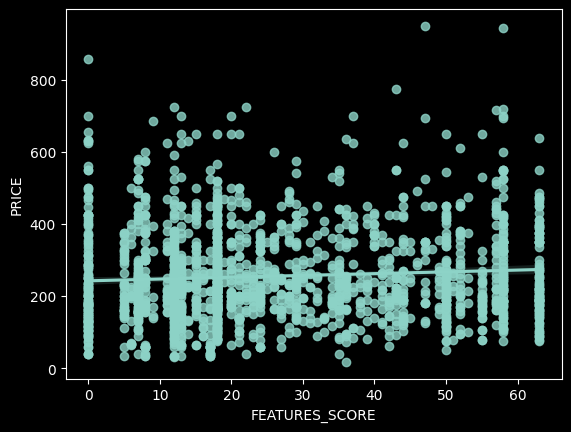

In [64]:
sns.regplot(ind_floor, x="FEATURES_SCORE", y="PRICE")

### LOCALITY_NAME

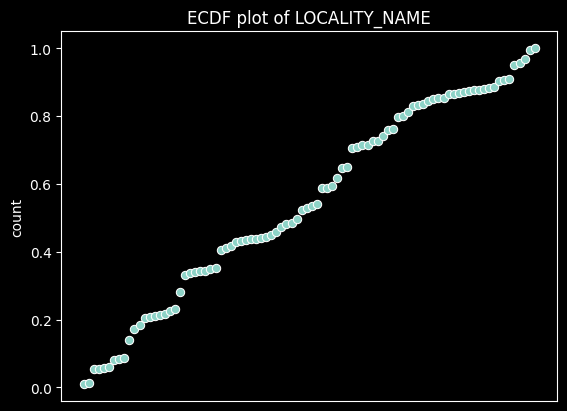

In [65]:
plt.xticks([])
univariate.ecdf_plot(ind_house["LOCALITY_NAME"])

In [66]:
ind_house["LOCALITY_NAME"].nunique()

90

In [67]:
ind_house["LOCALITY_NAME"].value_counts()[:10]

LOCALITY_NAME
sector 48 gurgaon      25
dlf phase 1            24
sector 109 gurgaon     23
palam vihar            22
nirvana country        22
sector 40 gurgaon      20
sushant lok phase 1    17
bissar                 17
sector 66 gurgaon      15
dlf phase 2            14
Name: count, dtype: int64

<Axes: xlabel='LOCALITY_NAME', ylabel='PRICE'>

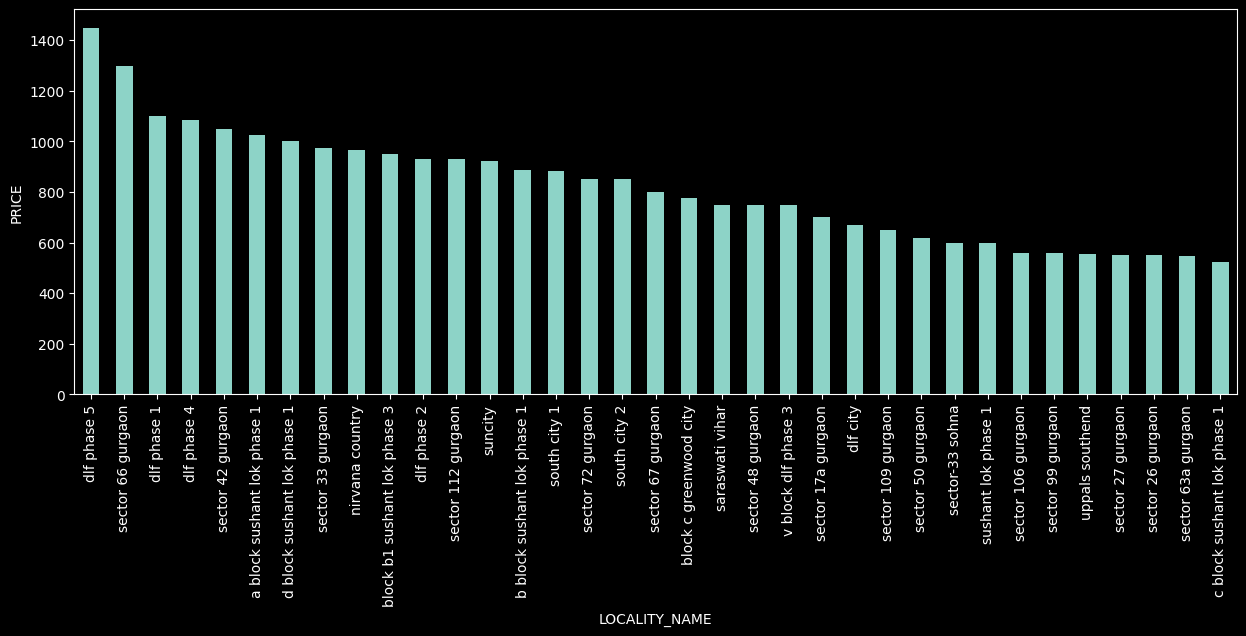

In [68]:
(
    ind_house.groupby("LOCALITY_NAME")["PRICE"]
    .median()
    .sort_values(ascending=False)[:35]
    .plot.bar(figsize=(15, 5), ylabel="PRICE")
)

## Rental Independent Floors

In [69]:
print(rent_ind_floor.shape)
rent_ind_floor.head()

(642, 33)


PROP_ID      SPID     CITY    PRICE  PRICE_SQFT  \
0  https://99acres.com/V70318584  70318584  gurgaon  0.12999         8.0   
1  https://99acres.com/A70375250  70375250  gurgaon  0.14500        16.0   
2  https://99acres.com/S70666054  70666054  gurgaon  0.15000        14.0   
3  https://99acres.com/A70122022  70122022  gurgaon  0.15500        17.0   
4  https://99acres.com/U71005354  71005354  gurgaon  0.16500        33.0   

     AREA  TOTAL_LANDMARK_COUNT  \
0  1464.0                  32.0   
1   900.0                  35.0   
2  1000.0                  46.0   
3   877.0                  26.0   
4   500.0                  46.0   

                                        PROP_HEADING  \
0  1 bhk independent builder floor in sector 22 g...   
1  1 bhk independent builder floor in sector 21 g...   
2  3 bhk independent builder floor in ashok vihar...   
3  1 bhk independent builder floor in sector 23a ...   
4  1 bhk independent builder floor in c block sus...   

                                         DESCRIPTION   PROPERTY_TYPE  ...  \
0  only 1 big sie bed room set available for rent...  Rent Ind Floor  ...   
1  one bhk builders floor apartment for rent in s...  Rent Ind Floor  ...   
2  carefully laid out in the prime location of gu...  Rent Ind Floor  ...   
3  one bhk builders floor apartment for rent in s...  Rent Ind Floor  ...   
4  fully furnished one room set for rent in susha...  Rent Ind Floor  ...   

                  SOCIETY_NAME  \
0  saksham welfare association   
1                sector 21 rwa   
2                          NaN   
3              progressive rwa   
4                        ansal   

                                             ADDRESS TRANSPORATION  \
0                                                NaN           0.0   
1                                                NaN           0.0   
2  2690/30,near shiv shakti mandir opposite new s...           3.0   
3                                                NaN           0.0   
4                                                NaN           2.0   

  ACCOMODATION LEISURE EDUCATION  HEALTH OTHER  AMENITIES_SCORE  \
0          2.0     3.0       0.0     5.0   3.0               20   
1          4.0     1.0       0.0     5.0   0.0               24   
2          5.0     0.0       2.0    10.0   3.0                0   
3          0.0     6.0       0.0     3.0   4.0               37   
4          6.0     0.0       2.0    11.0   3.0               43   

   FEATURES_SCORE  
0               7  
1              12  
2               0  
3              12  
4              12  

[5 rows x 33 columns]

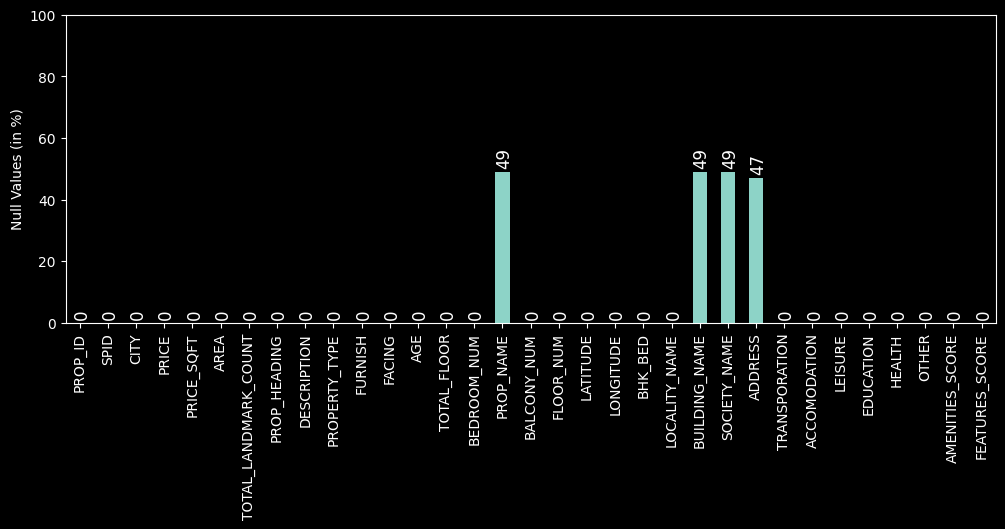

In [70]:
insights.null_plot(rent_ind_floor)

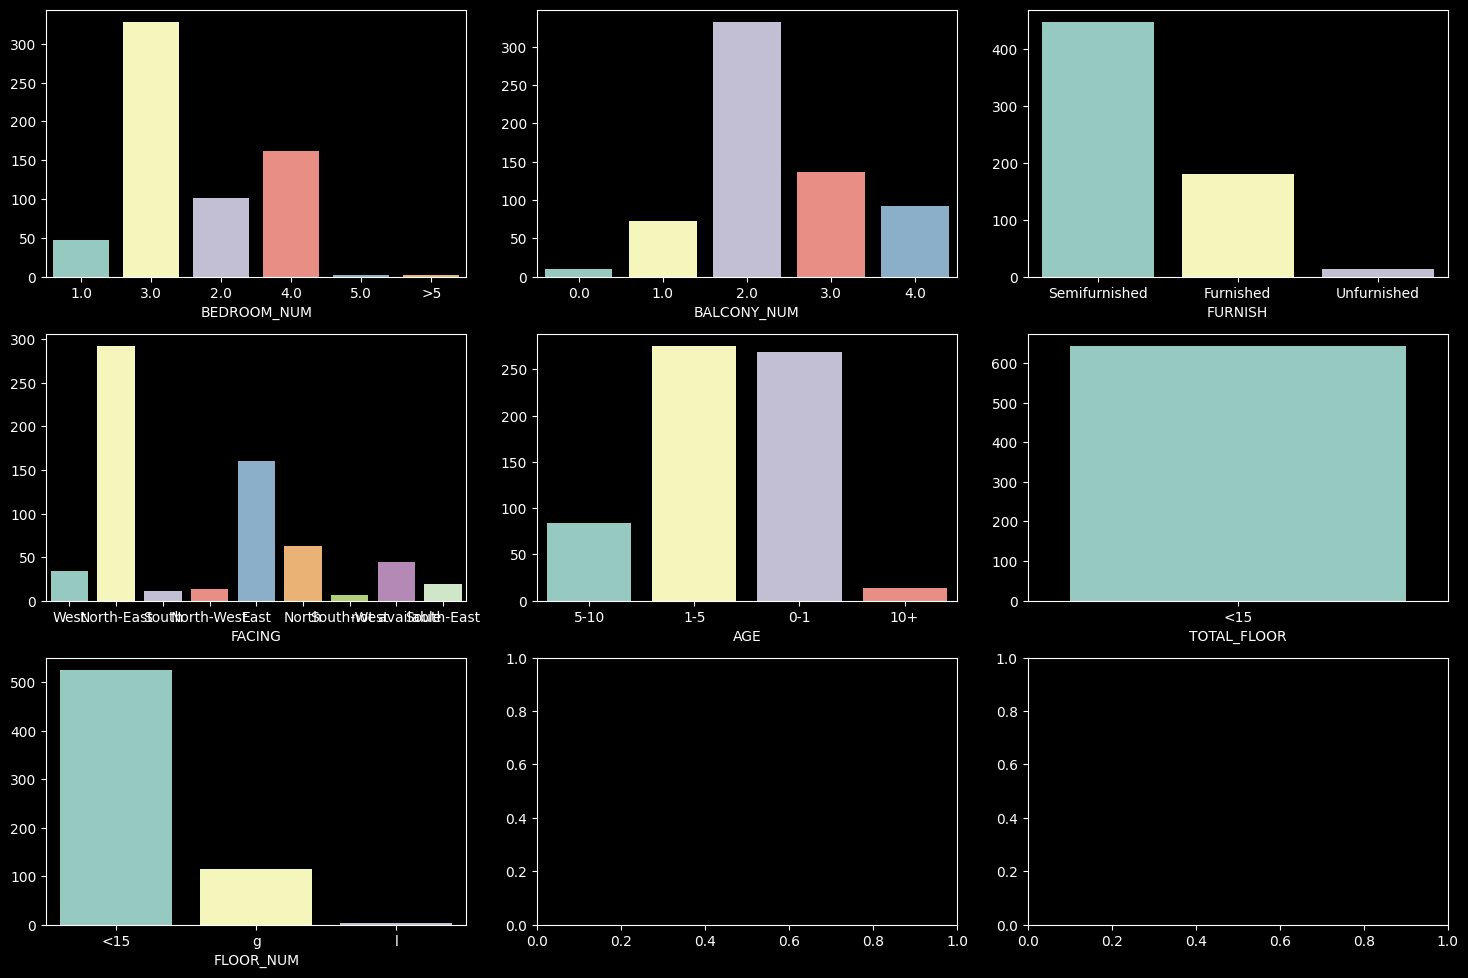

In [71]:
multivariate.count_plot(rent_ind_floor, cat_cols)

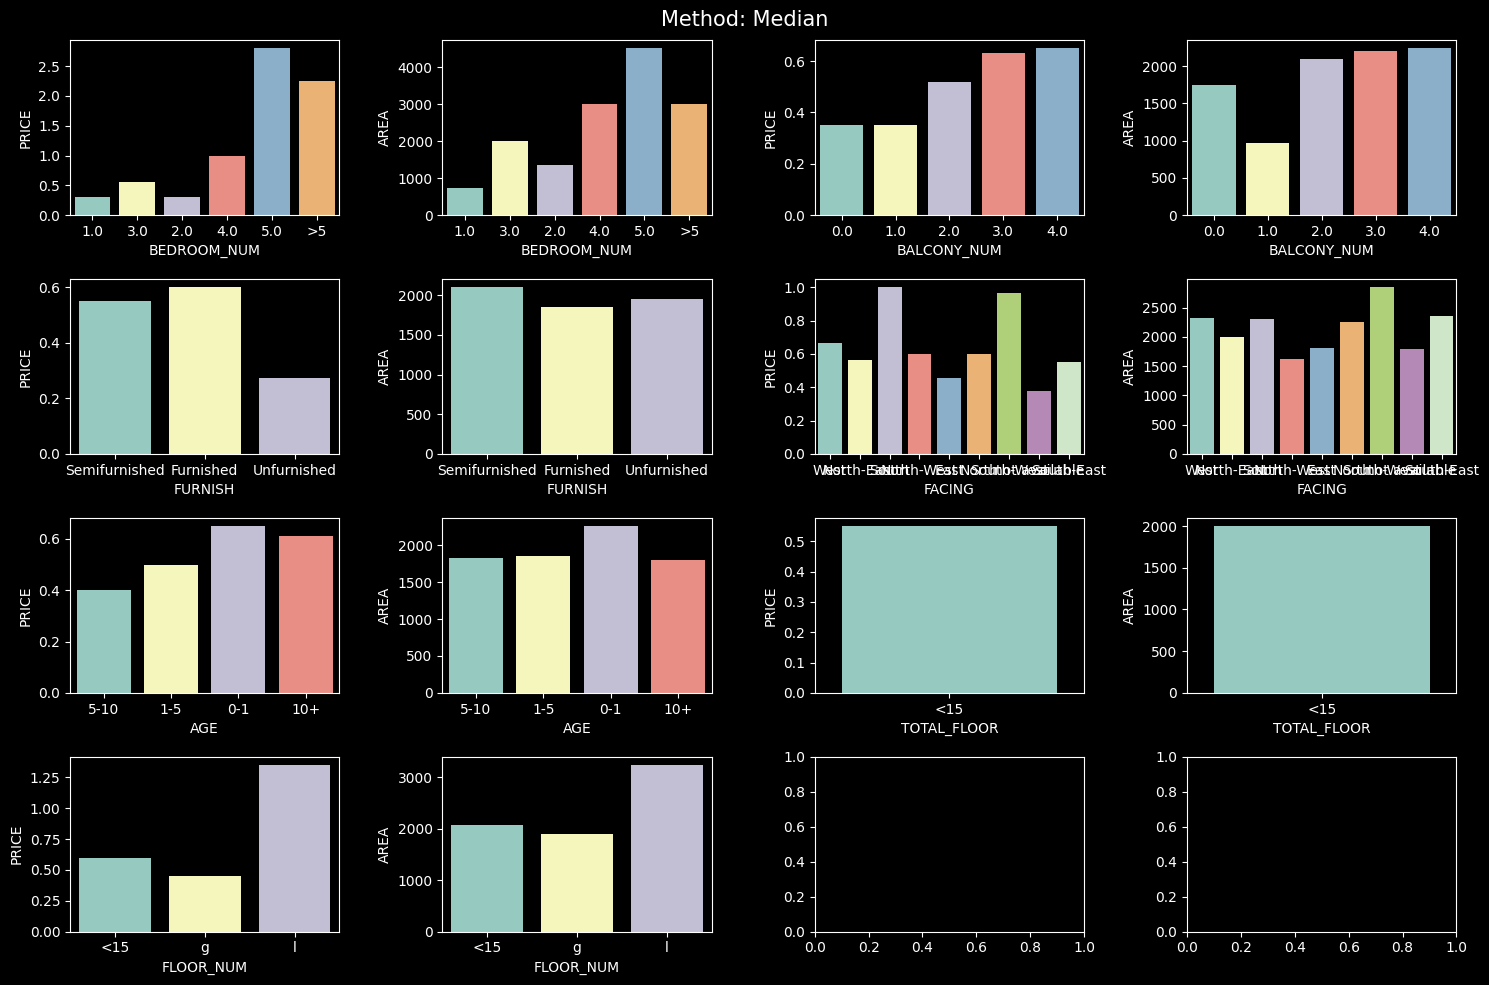

In [72]:
multivariate.agg_plot(rent_ind_floor, cat_cols, imp_cols, ["median"])

In [73]:
rent_ind_floor[imp_cols + num_cols].describe()

PRICE         AREA  AMENITIES_SCORE  FEATURES_SCORE
count  642.000000   642.000000       642.000000      642.000000
mean     0.664813  2149.105919        58.350467       23.381620
std      0.479121   948.496665        36.769089       18.044472
min      0.129990   160.000000         0.000000        0.000000
25%      0.350000  1550.000000        30.000000        8.250000
50%      0.550000  2000.000000        53.000000       18.000000
75%      0.775000  2700.000000        86.000000       34.000000
max      3.500000  4950.000000       134.000000       63.000000

### PRICE / AREA

<Axes: xlabel='AREA', ylabel='PRICE'>

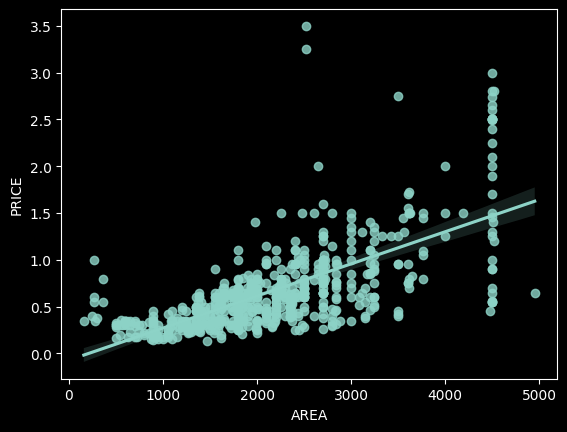

In [74]:
sns.regplot(rent_ind_floor, x="AREA", y="PRICE")

<Axes: xlabel='AREA', ylabel='PRICE'>

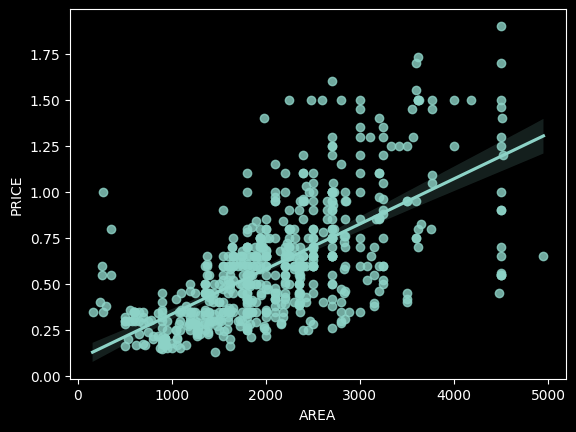

In [75]:
sns.regplot(rent_ind_floor.query("PRICE<2"), x="AREA", y="PRICE")

For some AREA value there are many different PRICE ranged properties available.

> Looks very scatter around the whole graph. But this _maybe_ works. (•_-)

### PRICE / PRICE_SQFT

<Axes: xlabel='PRICE_SQFT', ylabel='PRICE'>

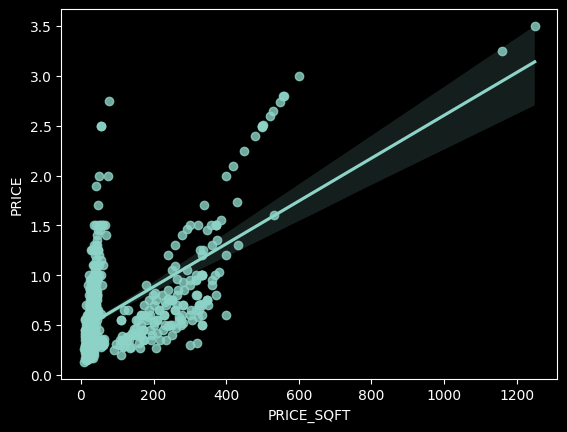

In [76]:
sns.regplot(rent_ind_floor, x="PRICE_SQFT", y="PRICE")

<Axes: xlabel='PRICE_SQFT', ylabel='PRICE'>

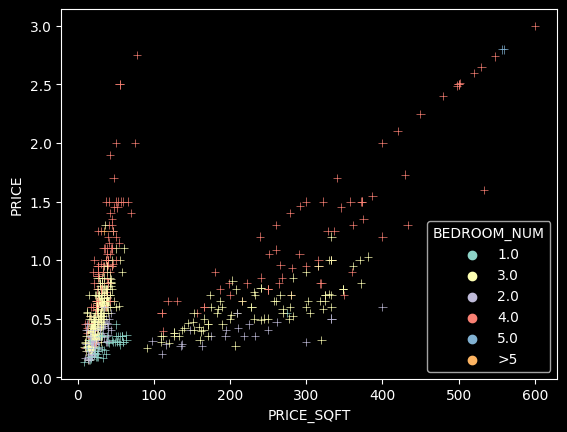

In [77]:
sns.scatterplot(
    rent_ind_floor.query("PRICE_SQFT<800"),
    x="PRICE_SQFT",
    y="PRICE",
    hue="BEDROOM_NUM",
    marker="+",
)

### PRICE / AMENITIES_SCORE

<Axes: xlabel='AMENITIES_SCORE', ylabel='PRICE'>

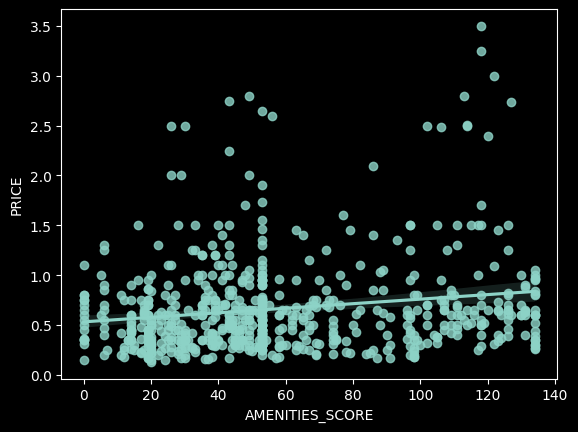

In [78]:
sns.regplot(rent_ind_floor, x="AMENITIES_SCORE", y="PRICE")

### PRICE / FEATURES_SCORE

<Axes: xlabel='FEATURES_SCORE', ylabel='PRICE'>

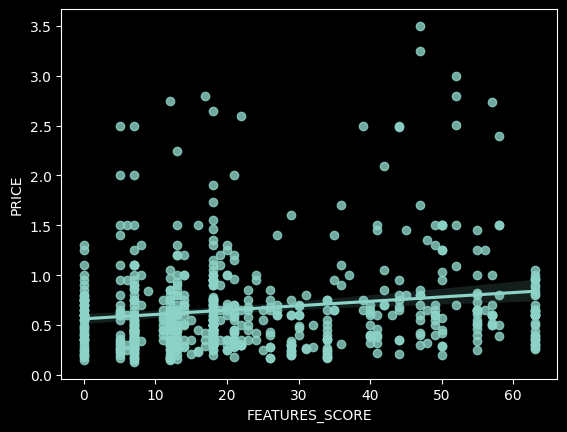

In [79]:
sns.regplot(rent_ind_floor, x="FEATURES_SCORE", y="PRICE")

### LOCALITY_NAME

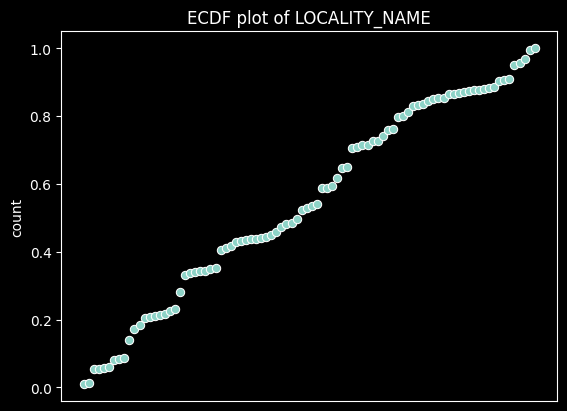

In [80]:
plt.xticks([])
univariate.ecdf_plot(ind_house["LOCALITY_NAME"])

In [81]:
ind_house["LOCALITY_NAME"].nunique()

90

In [82]:
ind_house["LOCALITY_NAME"].value_counts()[:10]

LOCALITY_NAME
sector 48 gurgaon      25
dlf phase 1            24
sector 109 gurgaon     23
palam vihar            22
nirvana country        22
sector 40 gurgaon      20
sushant lok phase 1    17
bissar                 17
sector 66 gurgaon      15
dlf phase 2            14
Name: count, dtype: int64

<Axes: xlabel='LOCALITY_NAME', ylabel='PRICE'>

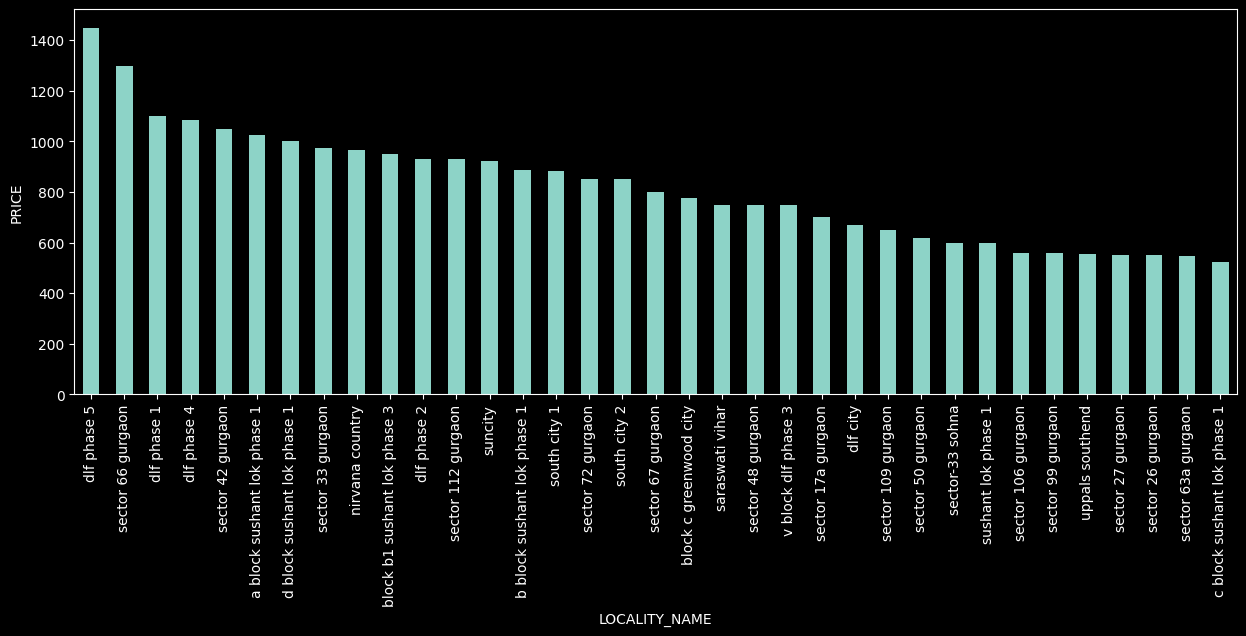

In [83]:
(
    ind_house.groupby("LOCALITY_NAME")["PRICE"]
    .median()
    .sort_values(ascending=False)[:35]
    .plot.bar(figsize=(15, 5), ylabel="PRICE")
)

## Residental Lands

In [84]:
print(res_land.shape)
res_land.head()

(987, 33)


PROP_ID      SPID     CITY  PRICE  PRICE_SQFT  \
0  https://99acres.com/R70515244  70515244  gurgaon    2.3       958.0   
1  https://99acres.com/J70707946  70707946  gurgaon    9.0     15000.0   
2  https://99acres.com/Q69980568  69980568  gurgaon   12.6      2000.0   
3  https://99acres.com/P70125644  70125644  gurgaon   15.0     12500.0   
4  https://99acres.com/Z70930360  70930360  gurgaon   15.0     15000.0   

     AREA  TOTAL_LANDMARK_COUNT                                 PROP_HEADING  \
0  2160.0                  45.0       residential land / plot in malibu town   
1    60.0                  50.0  residential land / plot in shree ram colony   
2   630.0                   2.0       residential land / plot in maruti kunj   
3   120.0                   2.0           residential land / plot in bhondsi   
4   900.0                  14.0     residential land / plot in farrukh nagar   

                                         DESCRIPTION PROPERTY_TYPE  ...  \
0  lemon street, malibu town, gurgaon, haryana 3s...      Res Land  ...   
1  sector 102 near by amstoria bptp  plots he plo...      Res Land  ...   
2  etr developers pvt. ltd. presents kuldeep aven...      Res Land  ...   
3  planning to purchase a plot in gurgaon? this p...      Res Land  ...   
4  we have a polt available for sale in farrukh n...      Res Land  ...   

   SOCIETY_NAME ADDRESS TRANSPORATION ACCOMODATION  LEISURE EDUCATION  HEALTH  \
0  malibu towne     NaN           0.0          2.0      2.0       0.0    21.0   
1   sector 102      NaN           0.0          0.0      0.0       1.0    43.0   
2           NaN     100           0.0          0.0      0.0       0.0     1.0   
3    shyam kunj     a22           0.0          0.0      0.0       0.0     1.0   
4           NaN     NaN           0.0          0.0      0.0       0.0    14.0   

  OTHER  AMENITIES_SCORE  FEATURES_SCORE  
0   1.0               24               0  
1   3.0               12               0  
2   1.0                5               0  
3   1.0               13               0  
4   0.0                6               0  

[5 rows x 33 columns]

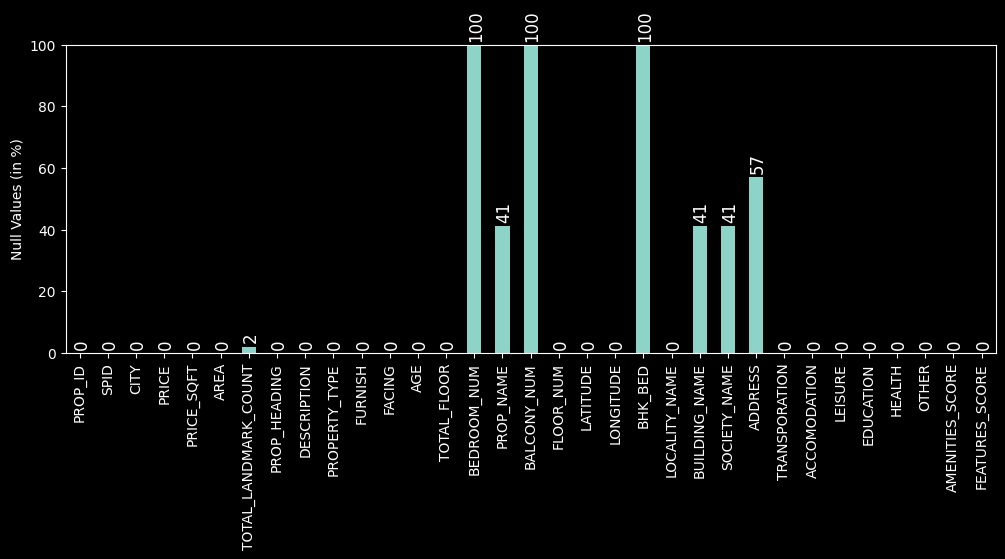

In [85]:
insights.null_plot(res_land)

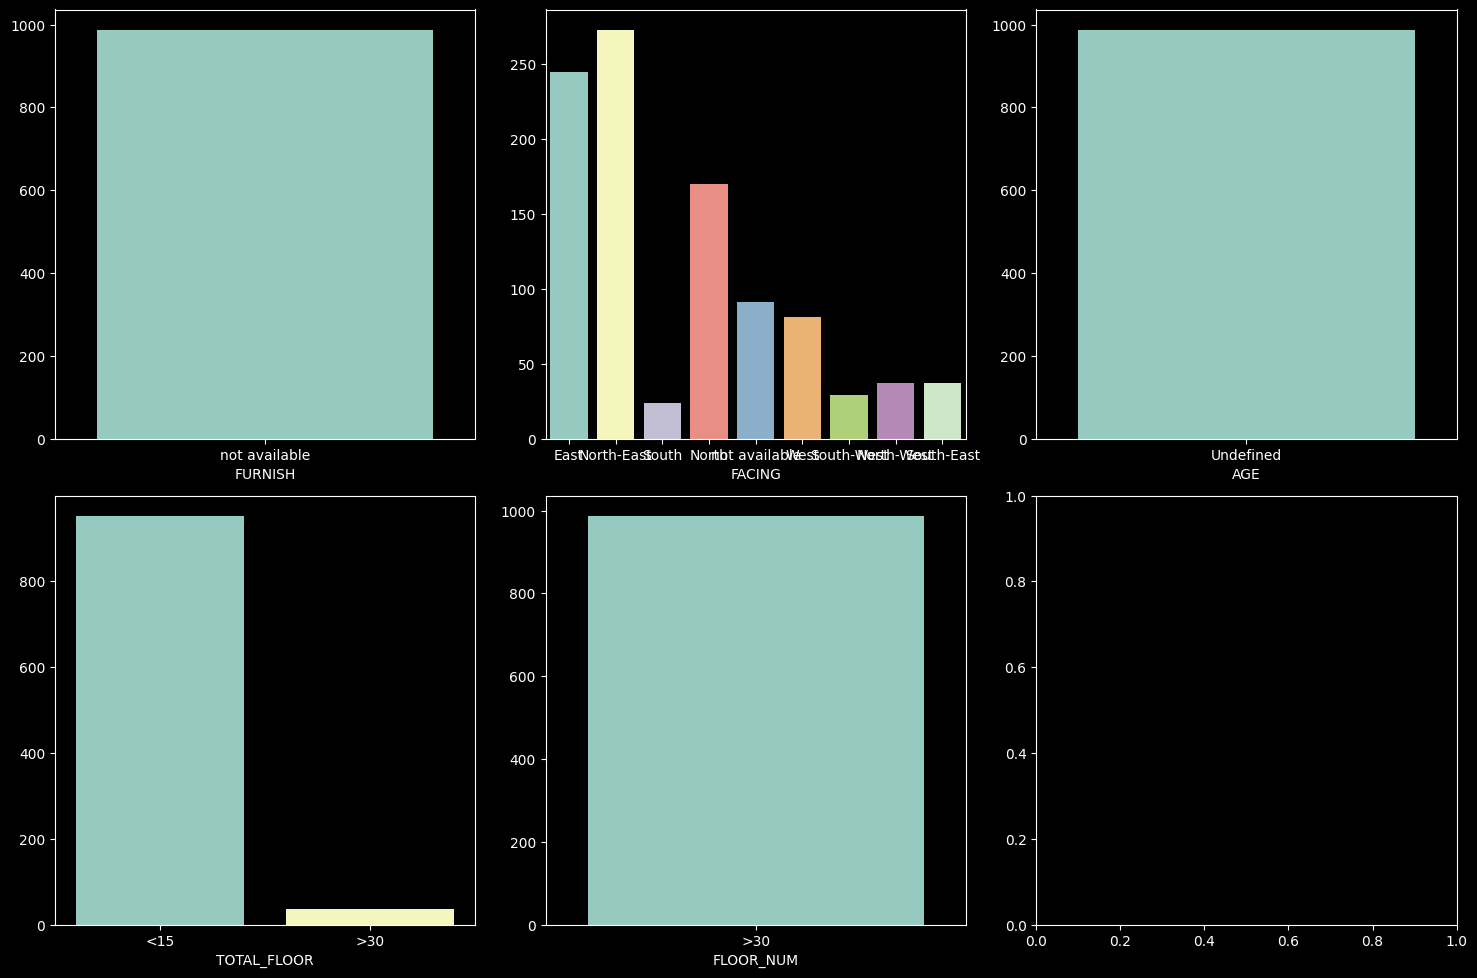

In [86]:
# Remove BEDROOM_NUM and BALCONY_NUM
# Because they are empty
multivariate.count_plot(res_land, cat_cols[2:])

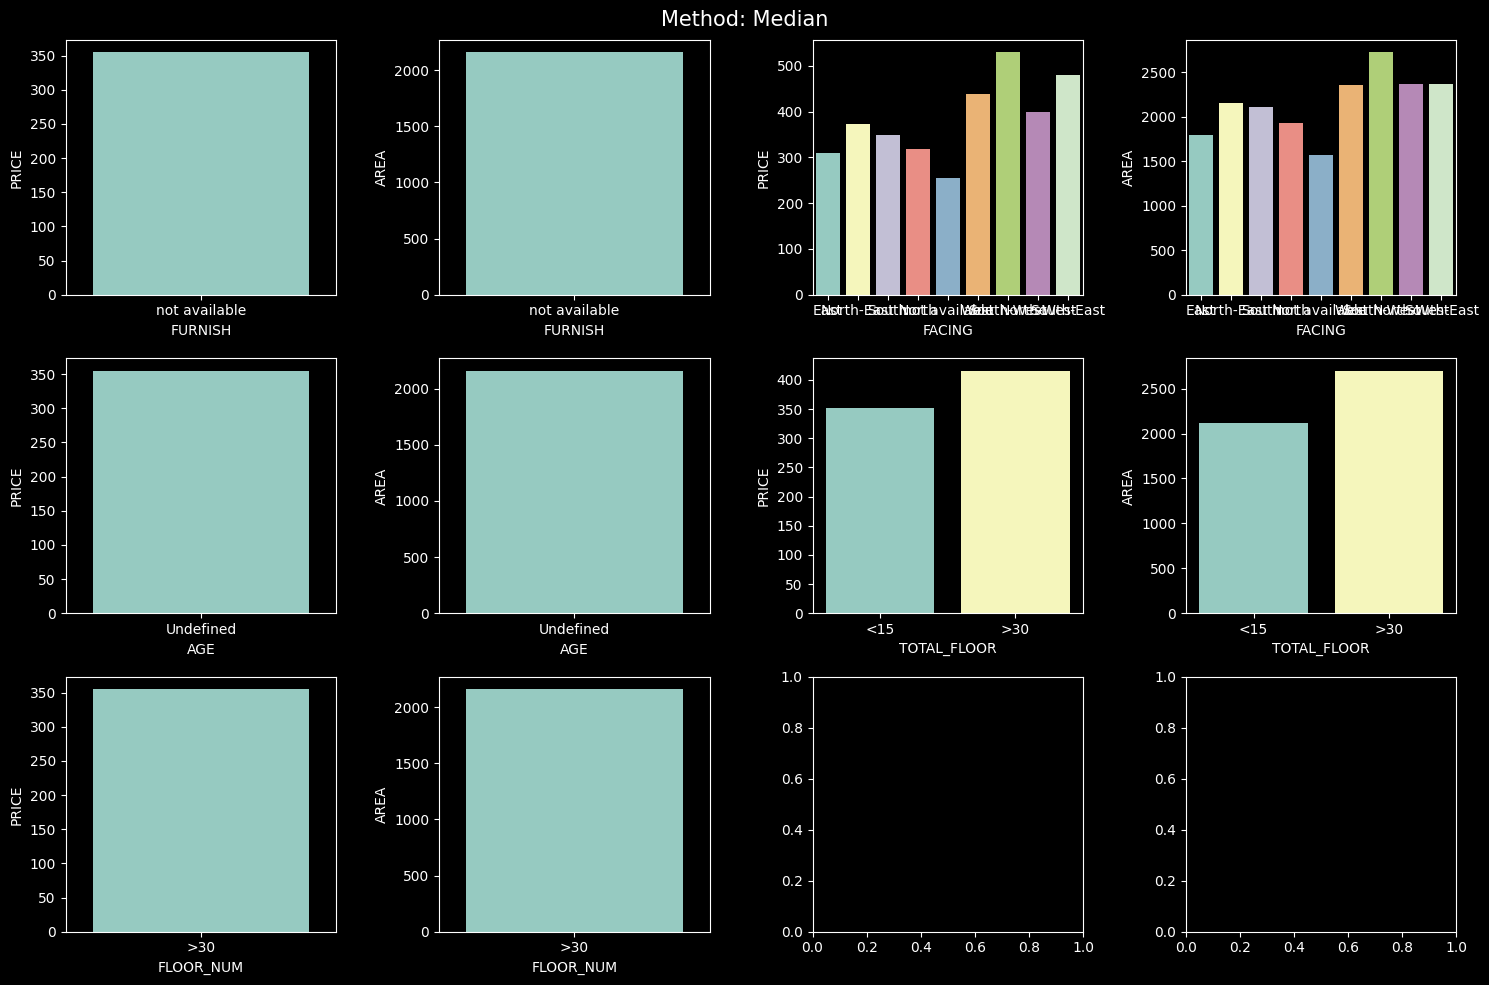

In [87]:
multivariate.agg_plot(res_land, cat_cols[2:], imp_cols, ["median"])

In [88]:
res_land[imp_cols + num_cols].describe()

PRICE          AREA  AMENITIES_SCORE  FEATURES_SCORE
count   987.000000    987.000000       987.000000           987.0
mean    466.123161   3016.526342        17.440729             0.0
std     430.913472   5369.351246         8.179359             0.0
min       2.300000     60.000000         0.000000             0.0
25%     182.500000   1350.000000        11.000000             0.0
50%     355.000000   2160.000000        24.000000             0.0
75%     592.000000   3150.000000        24.000000             0.0
max    4200.000000  87120.000000        24.000000             0.0

### PRICE / AREA

<Axes: xlabel='AREA', ylabel='PRICE'>

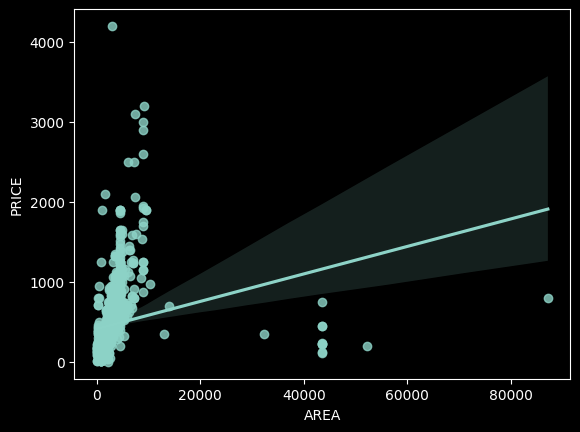

In [89]:
sns.regplot(res_land, x="AREA", y="PRICE")

(963, 33)


<Axes: xlabel='AREA', ylabel='PRICE'>

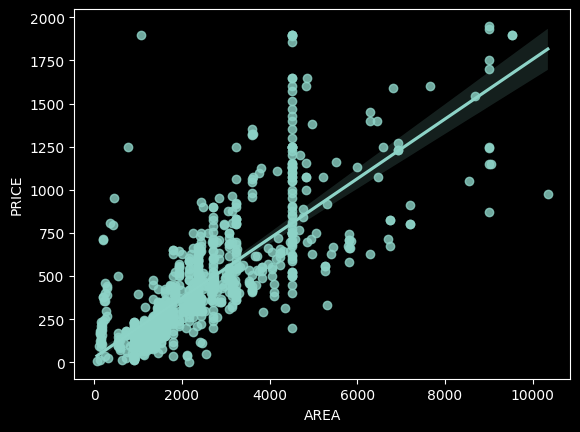

In [90]:
res_land.query("PRICE<2000 and AREA<12000", inplace=True)
print(res_land.shape)
sns.regplot(res_land, x="AREA", y="PRICE")

### PRICE / PRICE_SQFT

<Axes: xlabel='PRICE_SQFT', ylabel='PRICE'>

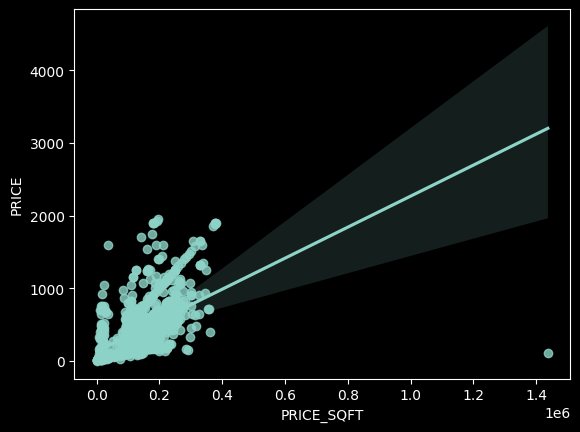

In [91]:
sns.regplot(res_land, x="PRICE_SQFT", y="PRICE")

<Axes: xlabel='PRICE_SQFT', ylabel='PRICE'>

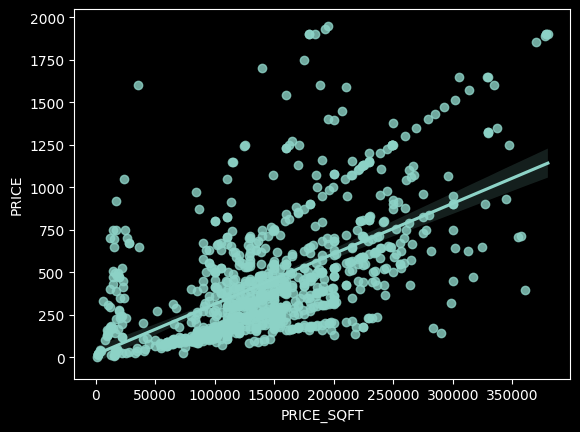

In [92]:
sns.regplot(res_land.query("PRICE_SQFT<5_00_000"), x="PRICE_SQFT", y="PRICE")

### PRICE / AMENITIES_SCORE

<Axes: xlabel='AMENITIES_SCORE', ylabel='PRICE'>

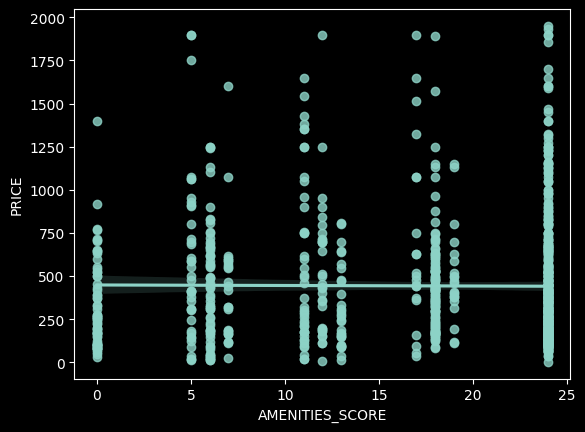

In [93]:
sns.regplot(res_land, x="AMENITIES_SCORE", y="PRICE")

### PRICE / FEATURES_SCORE

<Axes: xlabel='FEATURES_SCORE', ylabel='PRICE'>

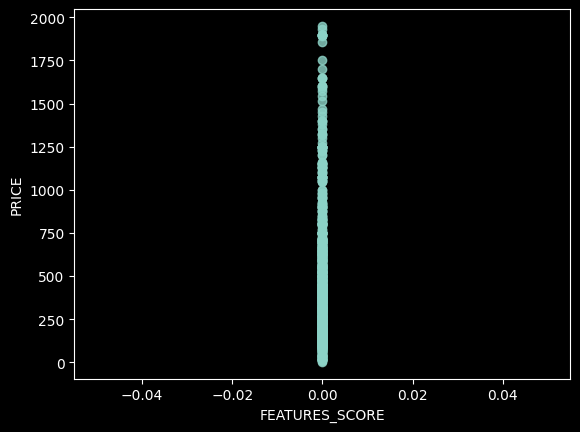

In [94]:
sns.regplot(res_land, x="FEATURES_SCORE", y="PRICE")

### LOCALITY_NAME

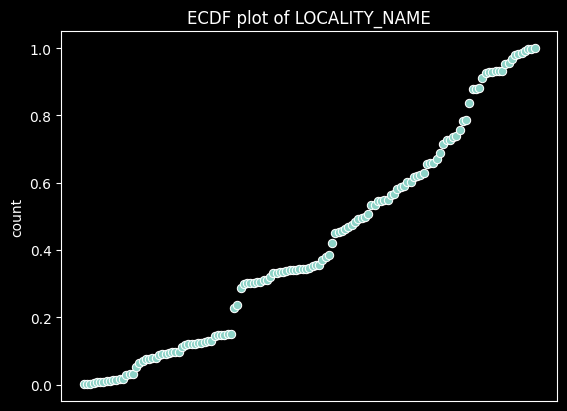

In [95]:
plt.xticks([])
univariate.ecdf_plot(res_land["LOCALITY_NAME"])

In [96]:
res_land["LOCALITY_NAME"].nunique()

139

In [97]:
res_land["LOCALITY_NAME"].value_counts()[:10]

LOCALITY_NAME
sector 102 gurgaon    73
sector 99 gurgaon     50
sector 108 gurgaon    49
sector 99a gurgaon    40
sector 45 gurgaon     32
sector 46 gurgaon     30
sector-33 sohna       30
sector 95 gurgaon     25
sector 88b gurgaon    25
sector 57 gurgaon     24
Name: count, dtype: int64

<Axes: xlabel='LOCALITY_NAME', ylabel='PRICE'>

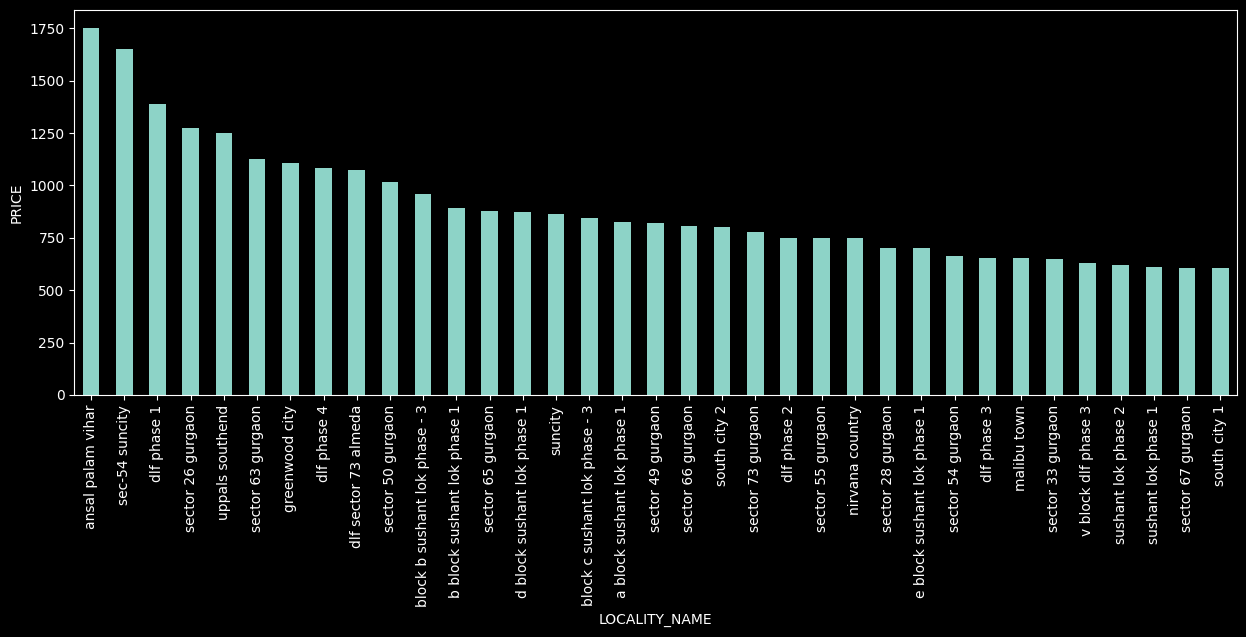

In [98]:
(
    res_land.groupby("LOCALITY_NAME")["PRICE"]
    .median()
    .sort_values(ascending=False)[:35]
    .plot.bar(figsize=(15, 5), ylabel="PRICE")
)

# Required features for Model Building

**Residential Apartment** : `CITY, PRICE, AREA, PROPERTY_TYPE, FURNISH, FACING, AGE, TOTAL_FLOOR, BEDROOM_NUM, BALCONY_NUM, FLOOR_NUM`

**Rental Apartment** : `CITY, PRICE, AREA, PROPERTY_TYPE, FURNISH, FACING, AGE, TOTAL_FLOOR, BEDROOM_NUM, BALCONY_NUM, FLOOR_NUM`

**Independent Floors** : `CITY, PRICE, AREA, PROPERTY_TYPE, FURNISH, FACING, AGE, BEDROOM_NUM, BALCONY_NUM`

**Independent House** : `CITY, PRICE, AREA, PROPERTY_TYPE, FURNISH, FACING, AGE, BEDROOM_NUM, BALCONY_NUM`

**Rental Independent Floors** : `CITY, PRICE, AREA, PROPERTY_TYPE, FURNISH, FACING, AGE, BEDROOM_NUM, BALCONY_NUM`

**Residential Land** : `CITY, PRICE, AREA, FACING`


### Notes

- `BHK_BED` is same as **`BEDROOM_NUM`**, so remove this column in the next step.
- `BUILDING_NAME, SOCIETY_NAME, ADDRESS` are not required for any work in this project either Analysis or Model building. _So remove them_.
- `LOCALITY_NAME, LONGITUDE, LATITUDE` is only required for analysis part.
- Make a choice between `FLOOR_NUM` and `TOTAL_FLOOR` after **feature selection** step. _Most likely keep `FLOOR_NUM`_.
- `TOTAL_LANDMARK_COUNT, TRANSPORATION, ACCOMODATION, LEISURE, EDUCATION, HEALTH, OTHER, AMENITIES_SCORE, FEATURES_SCORE` using these features create a new feature as **`LUXURY_TYPE`** of three categories (just like Sir).

> To improve results of the models; please gather the all `SUPER_BUILT_UP_AREA`, `BUILT_UP_AREA` and `CARPET_AREA` and then impute the `NaN` values of `BUILT_UP_AREA` using other then the model get the right area related to corresponding prperties.
> 
> Because I saw while visiting the properties (on the website), some properties contains `SUPER_BUILT_UP_AREA` and some contains others `AREA`. This is misleading for you and the model as well.